In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/project-management-risk-raw/project_risk_raw_dataset.csv


# Data Description

In [8]:
#Reading the dataset:

path = '/kaggle/input/project-management-risk-raw/project_risk_raw_dataset.csv'
df   = pd.read_csv(path)

In [9]:
df.head(5)
row, col = df.shape
print("There are ",  row, ' rows and ', col, ' columns in the dataset')

There are  4000  rows and  51  columns in the dataset


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Team_Size,4000.0,1.538825e+01,9.220969,2.00,9.0000,13.000,2.000000e+01,50.00
Project_Budget_USD,4000.0,1.143032e+06,590878.115350,159355.55,692532.9150,1007471.805,1.475870e+06,3768354.37
Estimated_Timeline_Months,4000.0,1.714775e+01,6.926609,2.00,12.0000,17.000,2.200000e+01,36.00
Complexity_Score,4000.0,6.192525e+00,2.212538,1.62,4.4600,6.015,7.862500e+00,10.00
Stakeholder_Count,4000.0,1.113050e+01,4.425875,2.00,8.0000,10.000,1.400000e+01,29.00
Past_Similar_Projects,4000.0,1.973750e+00,1.750093,0.00,1.0000,2.000,3.000000e+00,10.00
External_Dependencies_Count,4000.0,3.127750e+00,1.609216,0.00,2.0000,3.000,4.000000e+00,7.00
Change_Request_Frequency,4000.0,1.638080e+00,1.170451,0.01,0.7600,1.370,2.230000e+00,8.84
Team_Turnover_Rate,4000.0,2.927250e-01,0.166546,0.00,0.1600,0.270,4.000000e-01,0.85
Vendor_Reliability_Score,4000.0,7.120875e-01,0.163418,0.09,0.6000,0.730,8.400000e-01,1.00


In [11]:
# Check for null values in the dataset
if df.isna().any().any():
    print("There are null values in the dataset:")
    for i, col in enumerate(df.columns):
        if df[col].isna().any():
            print(f"- {col} has {df[col].isna().sum()*100/4000}% null values on columns number {i}")
else:
    print("No null values found in the dataset.")


There are null values in the dataset:
- Tech_Environment_Stability has 65.475% null values on columns number 38
- Change_Control_Maturity has 19.5% null values on columns number 43
- Risk_Management_Maturity has 19.775% null values on columns number 44


In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Numeric features: {len(num_cols)}")
print(f"Categorical features: {len(cat_cols)}")


Numeric features: 25
Categorical features: 26


In [13]:
print(num_cols)

Index(['Team_Size', 'Project_Budget_USD', 'Estimated_Timeline_Months',
       'Complexity_Score', 'Stakeholder_Count', 'Past_Similar_Projects',
       'External_Dependencies_Count', 'Change_Request_Frequency',
       'Team_Turnover_Rate', 'Vendor_Reliability_Score',
       'Historical_Risk_Incidents', 'Communication_Frequency',
       'Geographical_Distribution', 'Schedule_Pressure',
       'Budget_Utilization_Rate', 'Market_Volatility',
       'Integration_Complexity', 'Resource_Availability',
       'Organizational_Change_Frequency', 'Cross_Functional_Dependencies',
       'Previous_Delivery_Success_Rate', 'Technical_Debt_Level',
       'Project_Start_Month', 'Current_Phase_Duration_Months',
       'Seasonal_Risk_Factor'],
      dtype='object')


# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine grid size
n_cols = 5  # number of plots per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten() 

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    
# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

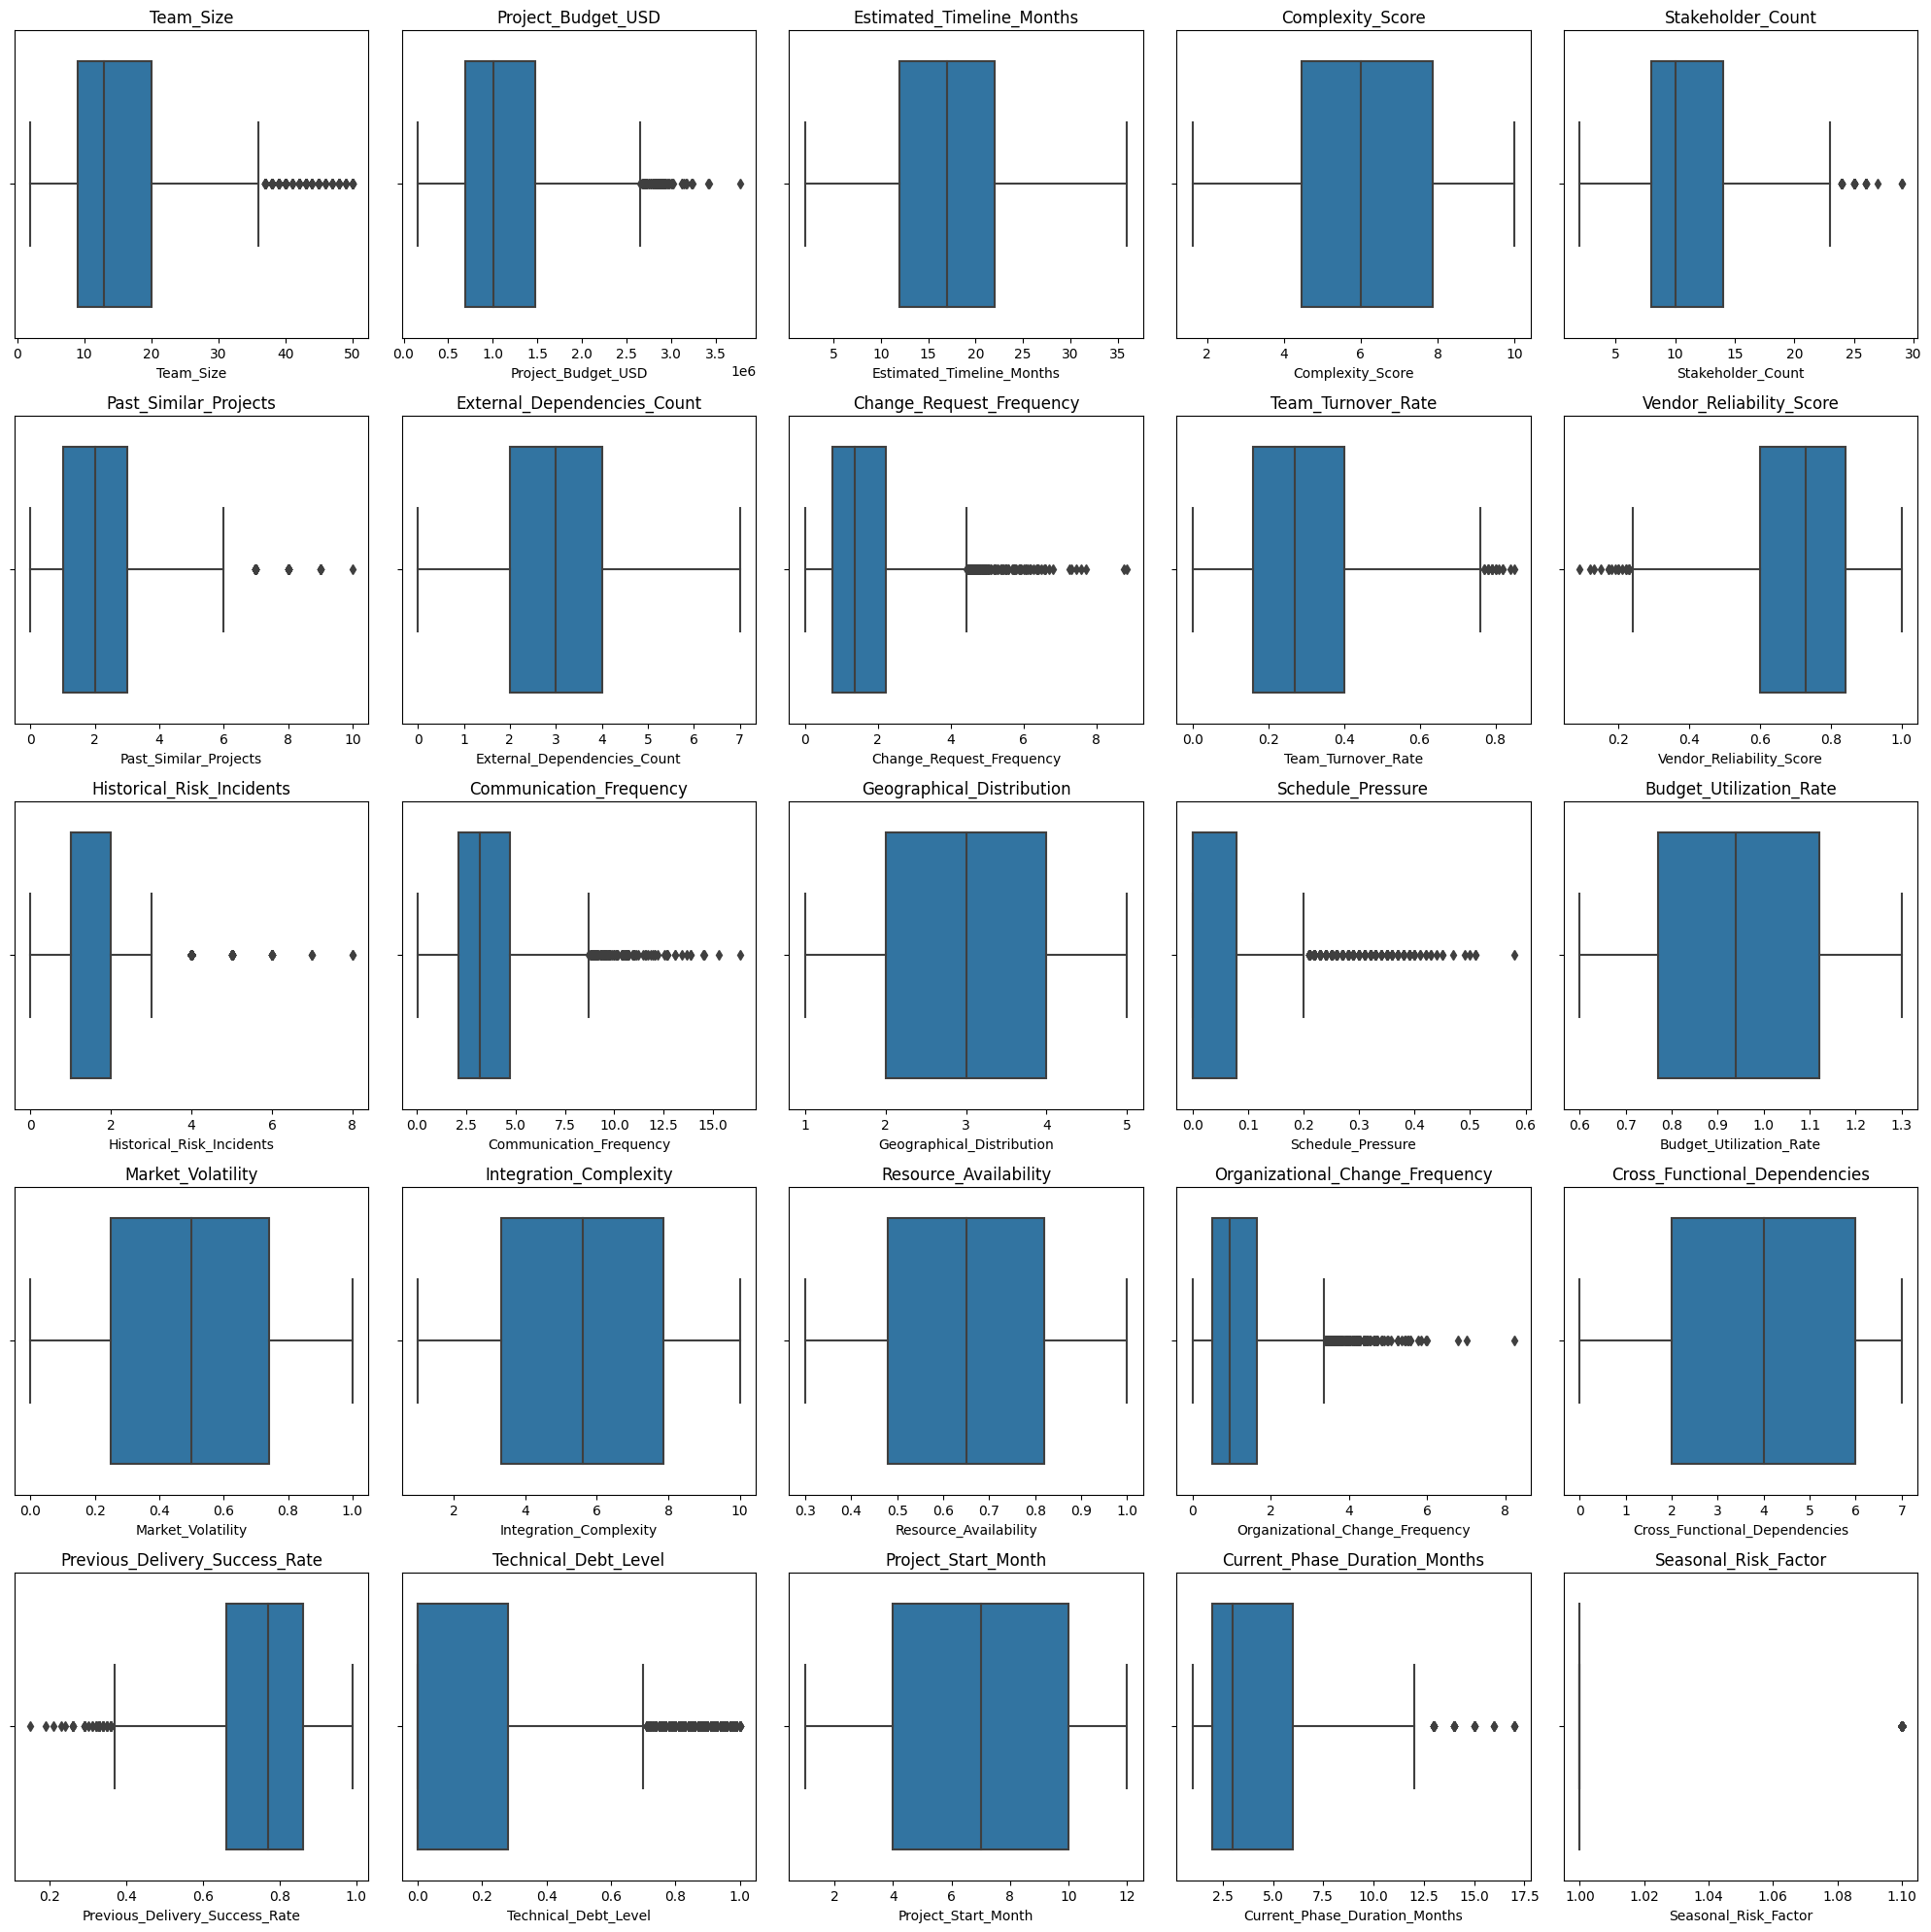

In [15]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [16]:
no_outliers = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Check if any value is outside the bounds
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    if outliers.empty:
        no_outliers.append(col)

print("Columns with no outliers \n :", no_outliers)

Columns with no outliers 
 : ['Estimated_Timeline_Months', 'Complexity_Score', 'External_Dependencies_Count', 'Geographical_Distribution', 'Budget_Utilization_Rate', 'Market_Volatility', 'Integration_Complexity', 'Resource_Availability', 'Cross_Functional_Dependencies', 'Project_Start_Month']


> However we should bring some columns to study the machine learning only as we cannot determine all of the columns to study from the users

In [17]:
df['Risk_Level'].value_counts()

Risk_Level
Medium      1396
High        1036
Low          806
Critical     762
Name: count, dtype: int64

In [18]:
'''
    Project Demographics: 
         -Project_Type, 
         -Project_Budget_USD, 
         -Estimated_Timeline_Months, 
         -Team_Size, 
         Complexity_Score.
    
    Operational Metrics: 
        -Change_Request_Frequency, 
        -Budget_Utilization_Rate, 
        -Resource_Availability, -
        Current_Phase_Duration_Months.
    
    Human Factors: 
        -Team_Experience_Level, 
        -Project_Manager_Experience, 
        -Stakeholder_Engagement_Level, 
        -Team_Turnover_Rate.
    
    Organizational Context: 
        -Org_Process_Maturity, 
        -Regulatory_Compliance_Level, 
        -Funding_Source, 
        -Risk_Management_Maturity.
    
    Technical Aspects: 
        -Technology_Familiarity, 
        -Technical_Debt_Level, 
        -Integration_Complexity, 
        -Tech_Environment_Stability.
    
    External Influences: 
        -Market_Volatility, 
        -Industry_Volatility, 
        -External_Dependencies_Count, 
        -Client_Experience_Level.

'''

'\n    Project Demographics: \n         -Project_Type, \n         -Project_Budget_USD, \n         -Estimated_Timeline_Months, \n         -Team_Size, \n         Complexity_Score.\n    \n    Operational Metrics: \n        -Change_Request_Frequency, \n        -Budget_Utilization_Rate, \n        -Resource_Availability, -\n        Current_Phase_Duration_Months.\n    \n    Human Factors: \n        -Team_Experience_Level, \n        -Project_Manager_Experience, \n        -Stakeholder_Engagement_Level, \n        -Team_Turnover_Rate.\n    \n    Organizational Context: \n        -Org_Process_Maturity, \n        -Regulatory_Compliance_Level, \n        -Funding_Source, \n        -Risk_Management_Maturity.\n    \n    Technical Aspects: \n        -Technology_Familiarity, \n        -Technical_Debt_Level, \n        -Integration_Complexity, \n        -Tech_Environment_Stability.\n    \n    External Influences: \n        -Market_Volatility, \n        -Industry_Volatility, \n        -External_Dependencies

In [19]:
df['Project_Type'].value_counts()

Project_Type
IT               1381
Construction      797
R&D               588
Manufacturing     418
Marketing         418
Healthcare        398
Name: count, dtype: int64

In [20]:
# There are over 60% of missing value on Tech_Environment_Stability
'''
We want to know what type of msising value it has

We will test it Human Factor with these columns:

Team_Experience_Level, 
Project_Manager_Experience
Stakeholder_Engagement_Level, 
Team_Turnover_Rate

'''
cols_human_factor =  ['Team_Experience_Level', 'Project_Manager_Experience', 'Stakeholder_Engagement_Level', 'Team_Turnover_Rate', 'Tech_Environment_Stability']
df_human_factor = df[cols_human_factor]
df_human_factor.head()

,Team_Experience_Level,Project_Manager_Experience,Stakeholder_Engagement_Level,Team_Turnover_Rate,Tech_Environment_Stability
0,Senior,Mid-level PM,Medium,0.16,NaN
1,Mixed,Mid-level PM,Excellent,0.42,NaN
2,Mixed,Mid-level PM,Excellent,0.55,NaN
3,Mixed,Certified PM,Medium,0.33,Mixed
4,Junior,Certified PM,Low,0.36,NaN


# Handle Missing Value

## Column Tech_Environment_Stability

In [21]:
'''
To further understand it, we should try plotting it
To do:
    - factorize the categorical into Label for easy plotting
    - Remove the Null value and study
'''

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


for col in df_human_factor.columns:
    print(df_human_factor[col].dtypes)
    if df_human_factor[col].dtypes == 'object':
        df_human_factor[col] = le.fit_transform(df_human_factor[col])
        # print(f'{col} is converted')

df_human_factor.head()

object
object
object
float64
object


/tmp/ipykernel_38/461762858.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human_factor[col] = le.fit_transform(df_human_factor[col])
/tmp/ipykernel_38/461762858.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human_factor[col] = le.fit_transform(df_human_factor[col])
/tmp/ipykernel_38/461762858.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,Team_Experience_Level,Project_Manager_Experience,Stakeholder_Engagement_Level,Team_Turnover_Rate,Tech_Environment_Stability
0,3,2,3,0.16,3
1,2,2,0,0.42,3
2,2,2,0,0.55,3
3,2,0,3,0.33,1
4,1,0,2,0.36,3


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

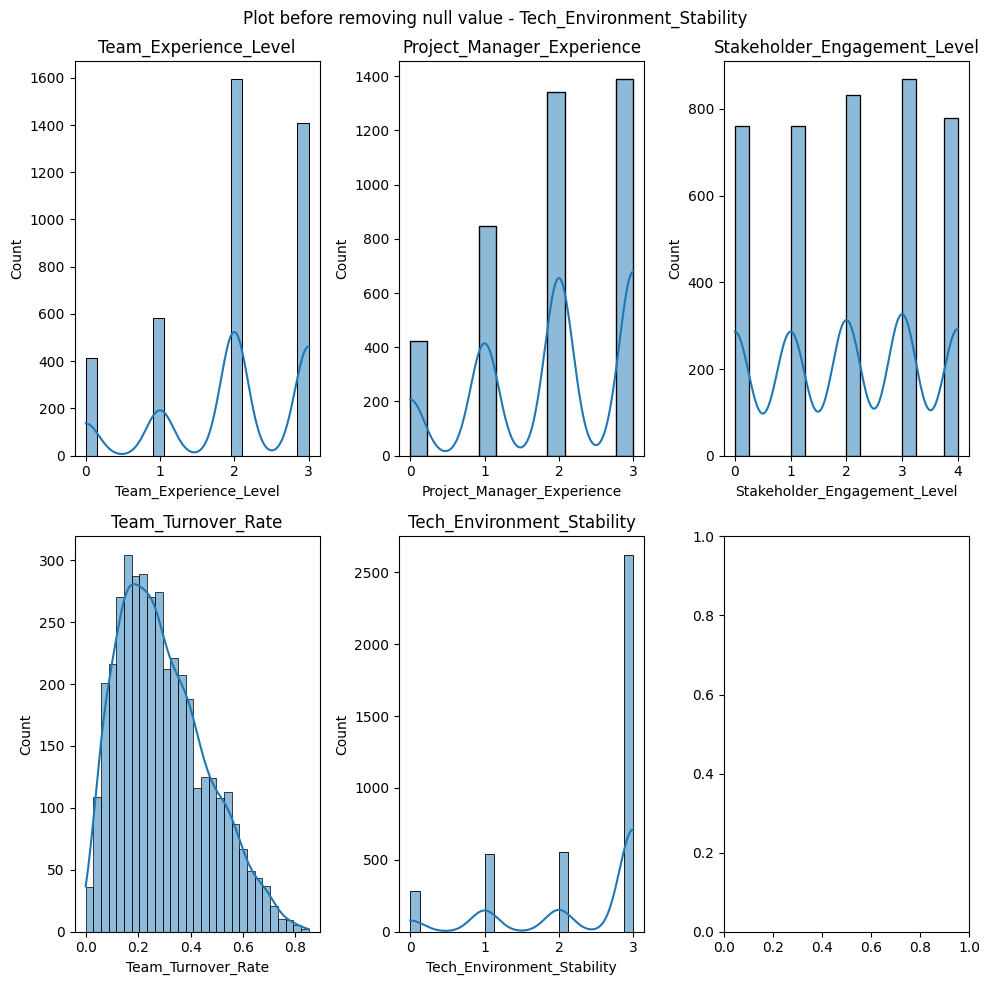

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(df_human_factor):
    sns.histplot(df_human_factor[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.suptitle("Plot before removing null value - Tech_Environment_Stability")
plt.tight_layout()
plt.show()

Before Removing (4000, 5)
After Remvoing (1381, 5)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

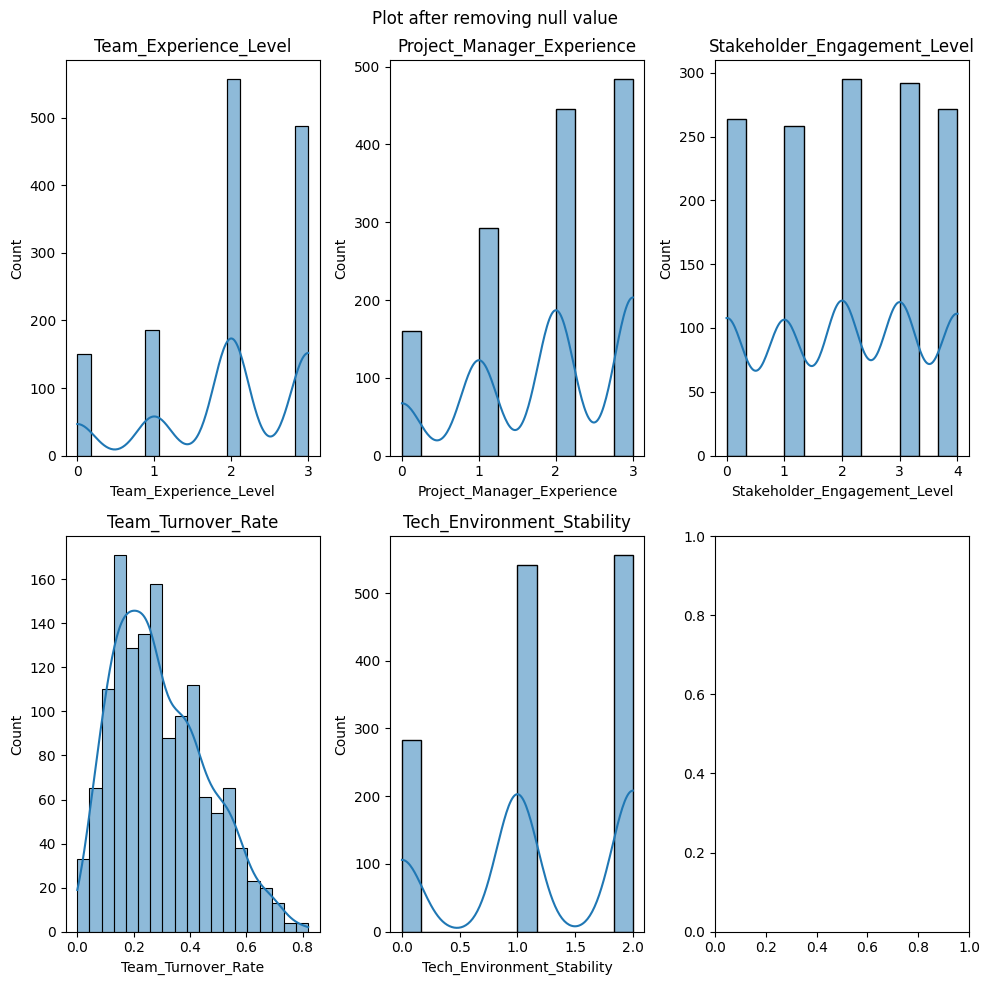

In [23]:
print("Before Removing", df_human_factor.shape)
df_human_factor = df_human_factor[df_human_factor['Tech_Environment_Stability'] != 3] #Using Encoder or Factorize changes the NaN to 0
print("After Remvoing", df_human_factor.shape)
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(df_human_factor):
    sns.histplot(df_human_factor[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.suptitle("Plot after removing null value")
plt.tight_layout()
plt.show()

**What we can do: changes in data and removing out many data which effect the studies, we should able to remove out the column from the study**

## Column Change_Control_Maturity

In [24]:
# There are nearly 20% of missing value on Change_Control_Maturity
'''
We want to know what type of msising value it has

We will test it Human Factor with these columns:

Team_Experience_Level, 
Project_Manager_Experience
Stakeholder_Engagement_Level, 
Team_Turnover_Rate

'''
cols_human_factor =  ['Team_Experience_Level', 'Project_Manager_Experience', 'Stakeholder_Engagement_Level', 'Team_Turnover_Rate', 'Change_Control_Maturity']
df_human_factor = df[cols_human_factor]
df_human_factor.head()

,Team_Experience_Level,Project_Manager_Experience,Stakeholder_Engagement_Level,Team_Turnover_Rate,Change_Control_Maturity
0,Senior,Mid-level PM,Medium,0.16,Basic
1,Mixed,Mid-level PM,Excellent,0.42,Advanced
2,Mixed,Mid-level PM,Excellent,0.55,NaN
3,Mixed,Certified PM,Medium,0.33,Formal
4,Junior,Certified PM,Low,0.36,Basic


In [25]:
'''
To further understand it, we should try plotting it
To do:
    - factorize the categorical into Label for easy plotting
    - Remove the Null value and study
'''

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


for col in df_human_factor.columns:
    # print(df_human_factor[col].dtypes)
    if df_human_factor[col].dtypes == 'object':
        df_human_factor[col] = le.fit_transform(df_human_factor[col])
        # print(f'{col} is converted')

df_human_factor.head()

/tmp/ipykernel_38/2451127867.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human_factor[col] = le.fit_transform(df_human_factor[col])
/tmp/ipykernel_38/2451127867.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human_factor[col] = le.fit_transform(df_human_factor[col])
/tmp/ipykernel_38/2451127867.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,Team_Experience_Level,Project_Manager_Experience,Stakeholder_Engagement_Level,Team_Turnover_Rate,Change_Control_Maturity
0,3,2,3,0.16,1
1,2,2,0,0.42,0
2,2,2,0,0.55,3
3,2,0,3,0.33,2
4,1,0,2,0.36,1


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

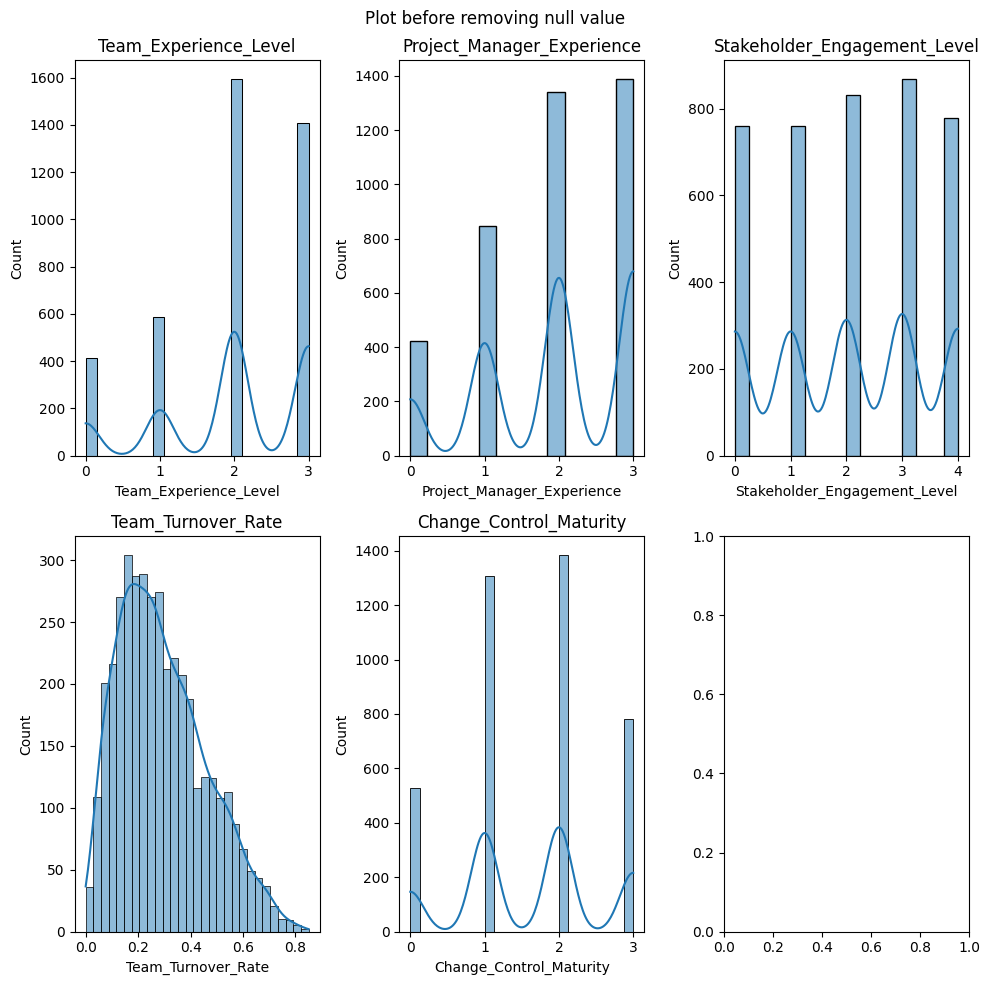

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(df_human_factor):
    sns.histplot(df_human_factor[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.suptitle("Plot before removing null value")
plt.tight_layout()
plt.show()

Before Removing (4000, 5)
After Remvoing (3220, 5)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

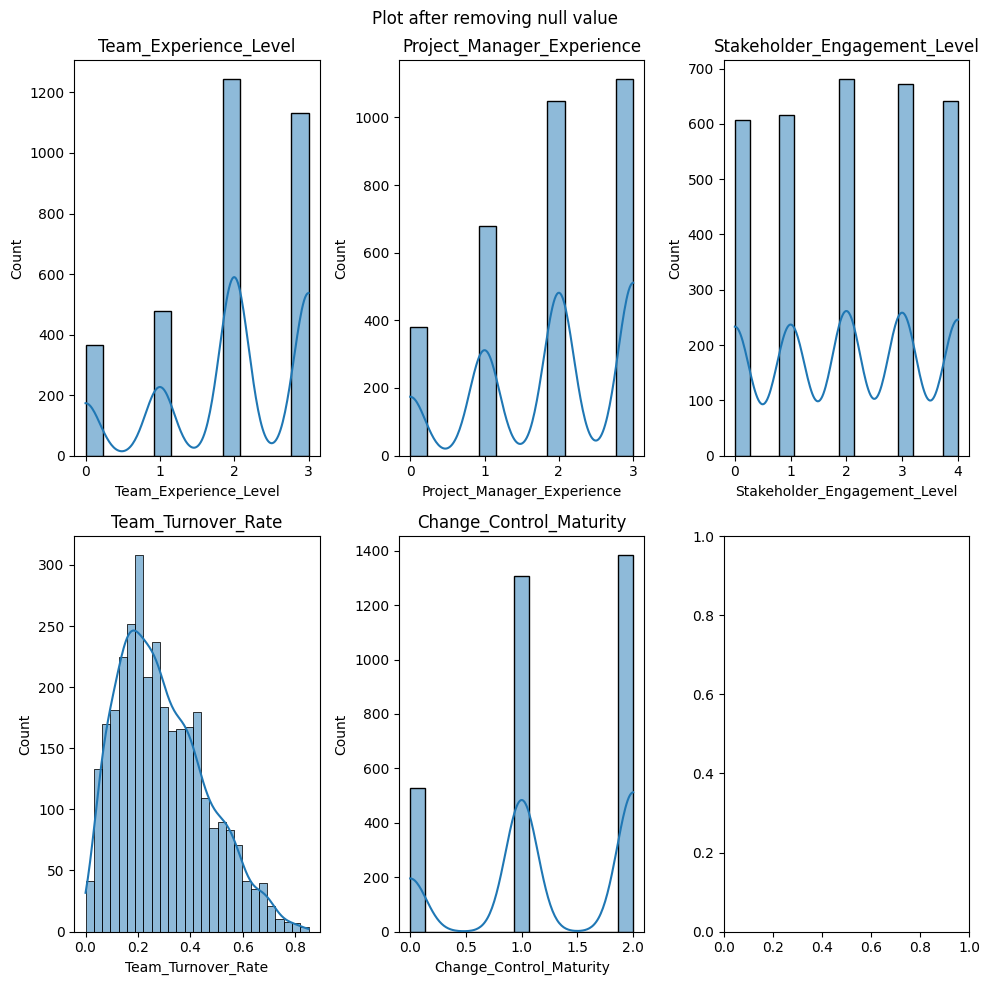

In [27]:
print("Before Removing", df_human_factor.shape)
df_human_factor = df_human_factor[df_human_factor['Change_Control_Maturity'] != 3] #Using Encoder or Factorize changes the NaN to 3
print("After Remvoing", df_human_factor.shape)
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(df_human_factor):
    sns.histplot(df_human_factor[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.suptitle("Plot after removing null value")
plt.tight_layout()
plt.show()

**Change_Control_Maturity does not making big shift in data, removed data around 800 rows which does not really effect base on total rows**

## Column Risk_Management_Maturity

In [28]:
# There are nearly 20% of missing value on Risk_Management_Maturity
'''
We want to know what type of msising value it has

We will test it Human Factor with these columns:

Team_Experience_Level, 
Project_Manager_Experience
Stakeholder_Engagement_Level, 
Team_Turnover_Rate

'''
cols_human_factor =  ['Team_Experience_Level', 'Project_Manager_Experience', 'Stakeholder_Engagement_Level', 'Team_Turnover_Rate', 'Risk_Management_Maturity']
df_human_factor = df[cols_human_factor]
df_human_factor.head()

,Team_Experience_Level,Project_Manager_Experience,Stakeholder_Engagement_Level,Team_Turnover_Rate,Risk_Management_Maturity
0,Senior,Mid-level PM,Medium,0.16,Basic
1,Mixed,Mid-level PM,Excellent,0.42,Formal
2,Mixed,Mid-level PM,Excellent,0.55,NaN
3,Mixed,Certified PM,Medium,0.33,Basic
4,Junior,Certified PM,Low,0.36,NaN


In [29]:
'''
To further understand it, we should try plotting it
To do:
    - factorize the categorical into Label for easy plotting
    - Remove the Null value and study
'''

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


for col in df_human_factor.columns:
    print(df_human_factor[col].dtypes)
    if df_human_factor[col].dtypes == 'object':
        df_human_factor[col] = le.fit_transform(df_human_factor[col])
        print(f'{col} is converted')

df_human_factor.head()

object
Team_Experience_Level is converted
object
Project_Manager_Experience is converted
object
Stakeholder_Engagement_Level is converted
float64
object
Risk_Management_Maturity is converted


/tmp/ipykernel_38/2030157405.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human_factor[col] = le.fit_transform(df_human_factor[col])
/tmp/ipykernel_38/2030157405.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human_factor[col] = le.fit_transform(df_human_factor[col])
/tmp/ipykernel_38/2030157405.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,Team_Experience_Level,Project_Manager_Experience,Stakeholder_Engagement_Level,Team_Turnover_Rate,Risk_Management_Maturity
0,3,2,3,0.16,1
1,2,2,0,0.42,2
2,2,2,0,0.55,3
3,2,0,3,0.33,1
4,1,0,2,0.36,3


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

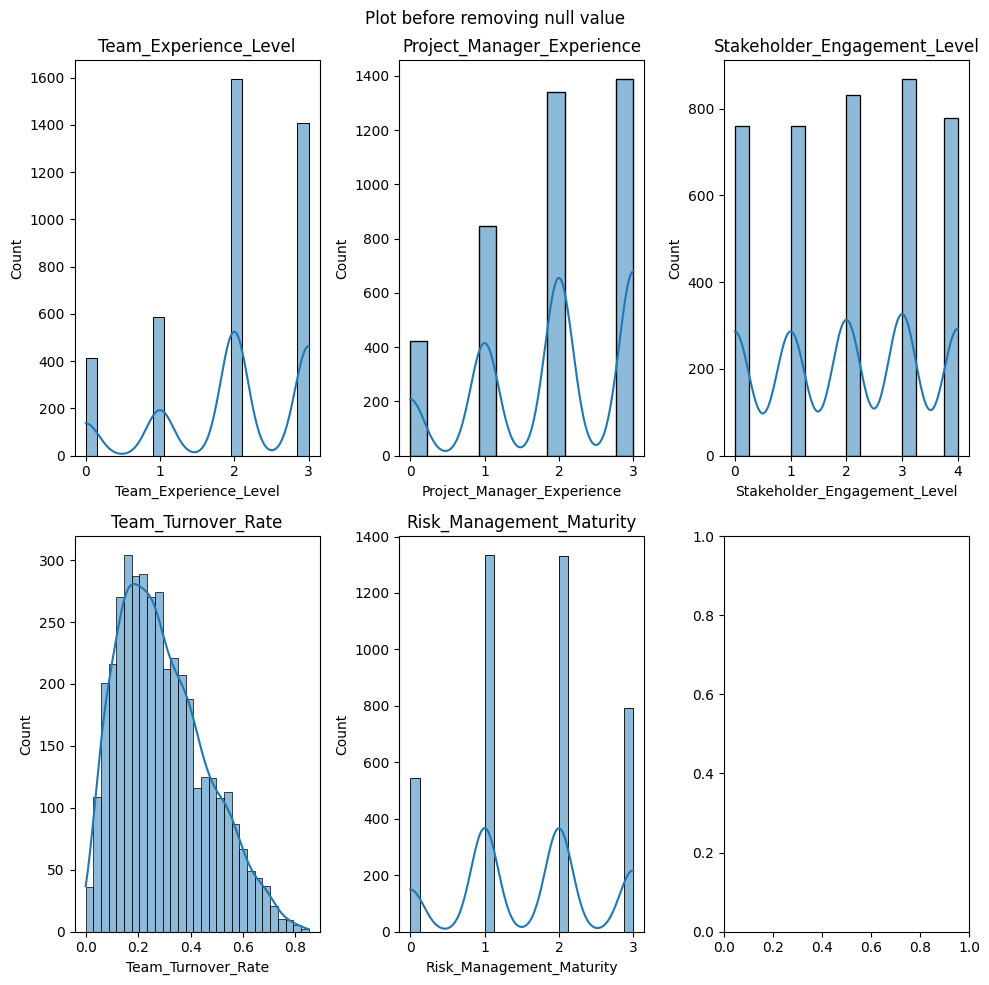

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(df_human_factor):
    sns.histplot(df_human_factor[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

fig.suptitle("Plot before removing null value")
plt.tight_layout()
plt.show()


Before Removing (4000, 5)
After Remvoing (3209, 5)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

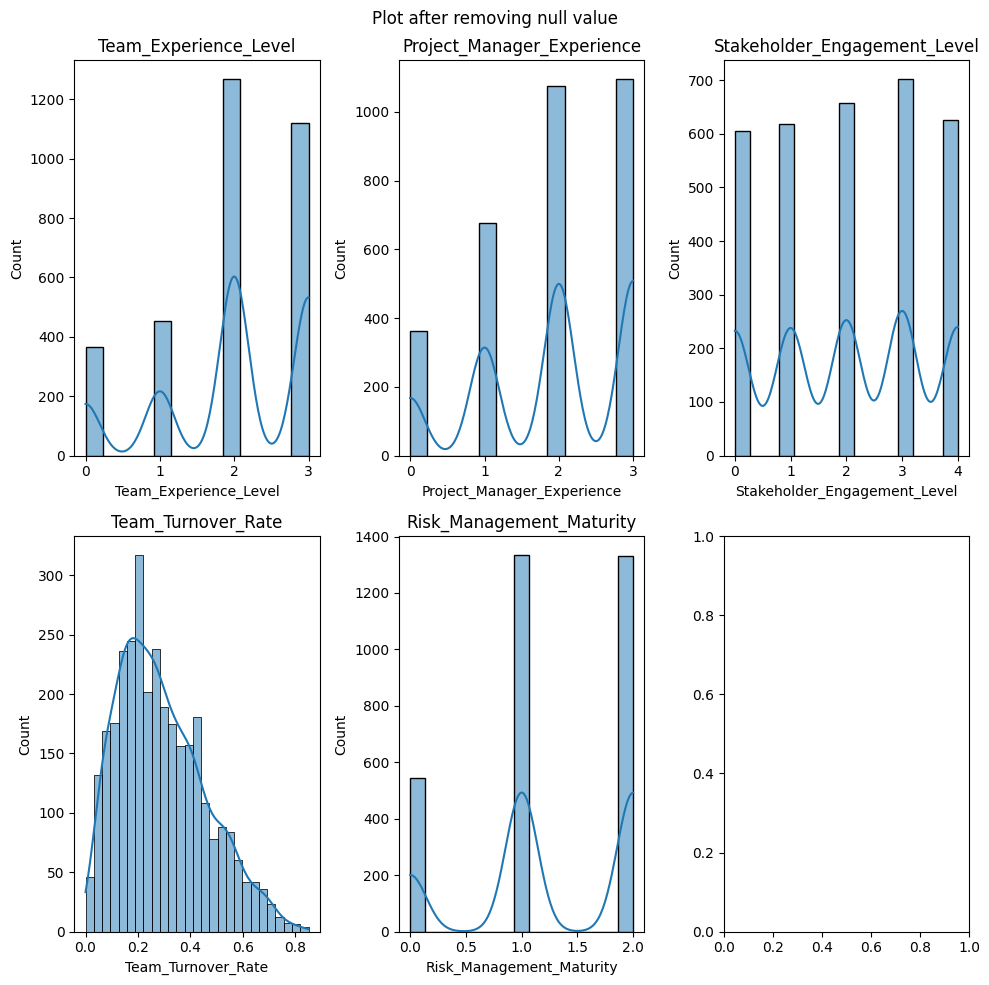

In [31]:
print("Before Removing", df_human_factor.shape)
df_human_factor = df_human_factor[df_human_factor['Risk_Management_Maturity'] != 3] #Using Encoder or Factorize changes the NaN to 3
print("After Remvoing", df_human_factor.shape)
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(df_human_factor):
    sns.histplot(df_human_factor[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.suptitle("Plot after removing null value")
plt.tight_layout()
plt.show()

**Same goes for Risk_Management_Maturity**

## Handle Missing Overall with df

In [32]:
# Base on the 3 columns, we can try handling this value with these methods:
# - Remove Tech_Environment_Stability
# - Rmove NaN values from Change_Control_Maturity
# - Remove NaN values from Risk_Management_Maturity 

# If the data seems to make shift other columns or changes, we will find another method

df_ = df.copy()
df_ = df_.drop(columns='Tech_Environment_Stability', axis = 1)
df_ = df_.dropna( subset= ['Change_Control_Maturity', 'Risk_Management_Maturity'])

if df_.isna().any().sum():
    print("There are no null values from our dataframe")
else: 
    print("Data is cleaned")

print(f"Data after cleaning is {df_.shape} ")

Data is cleaned
Data after cleaning is (2701, 50) 


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

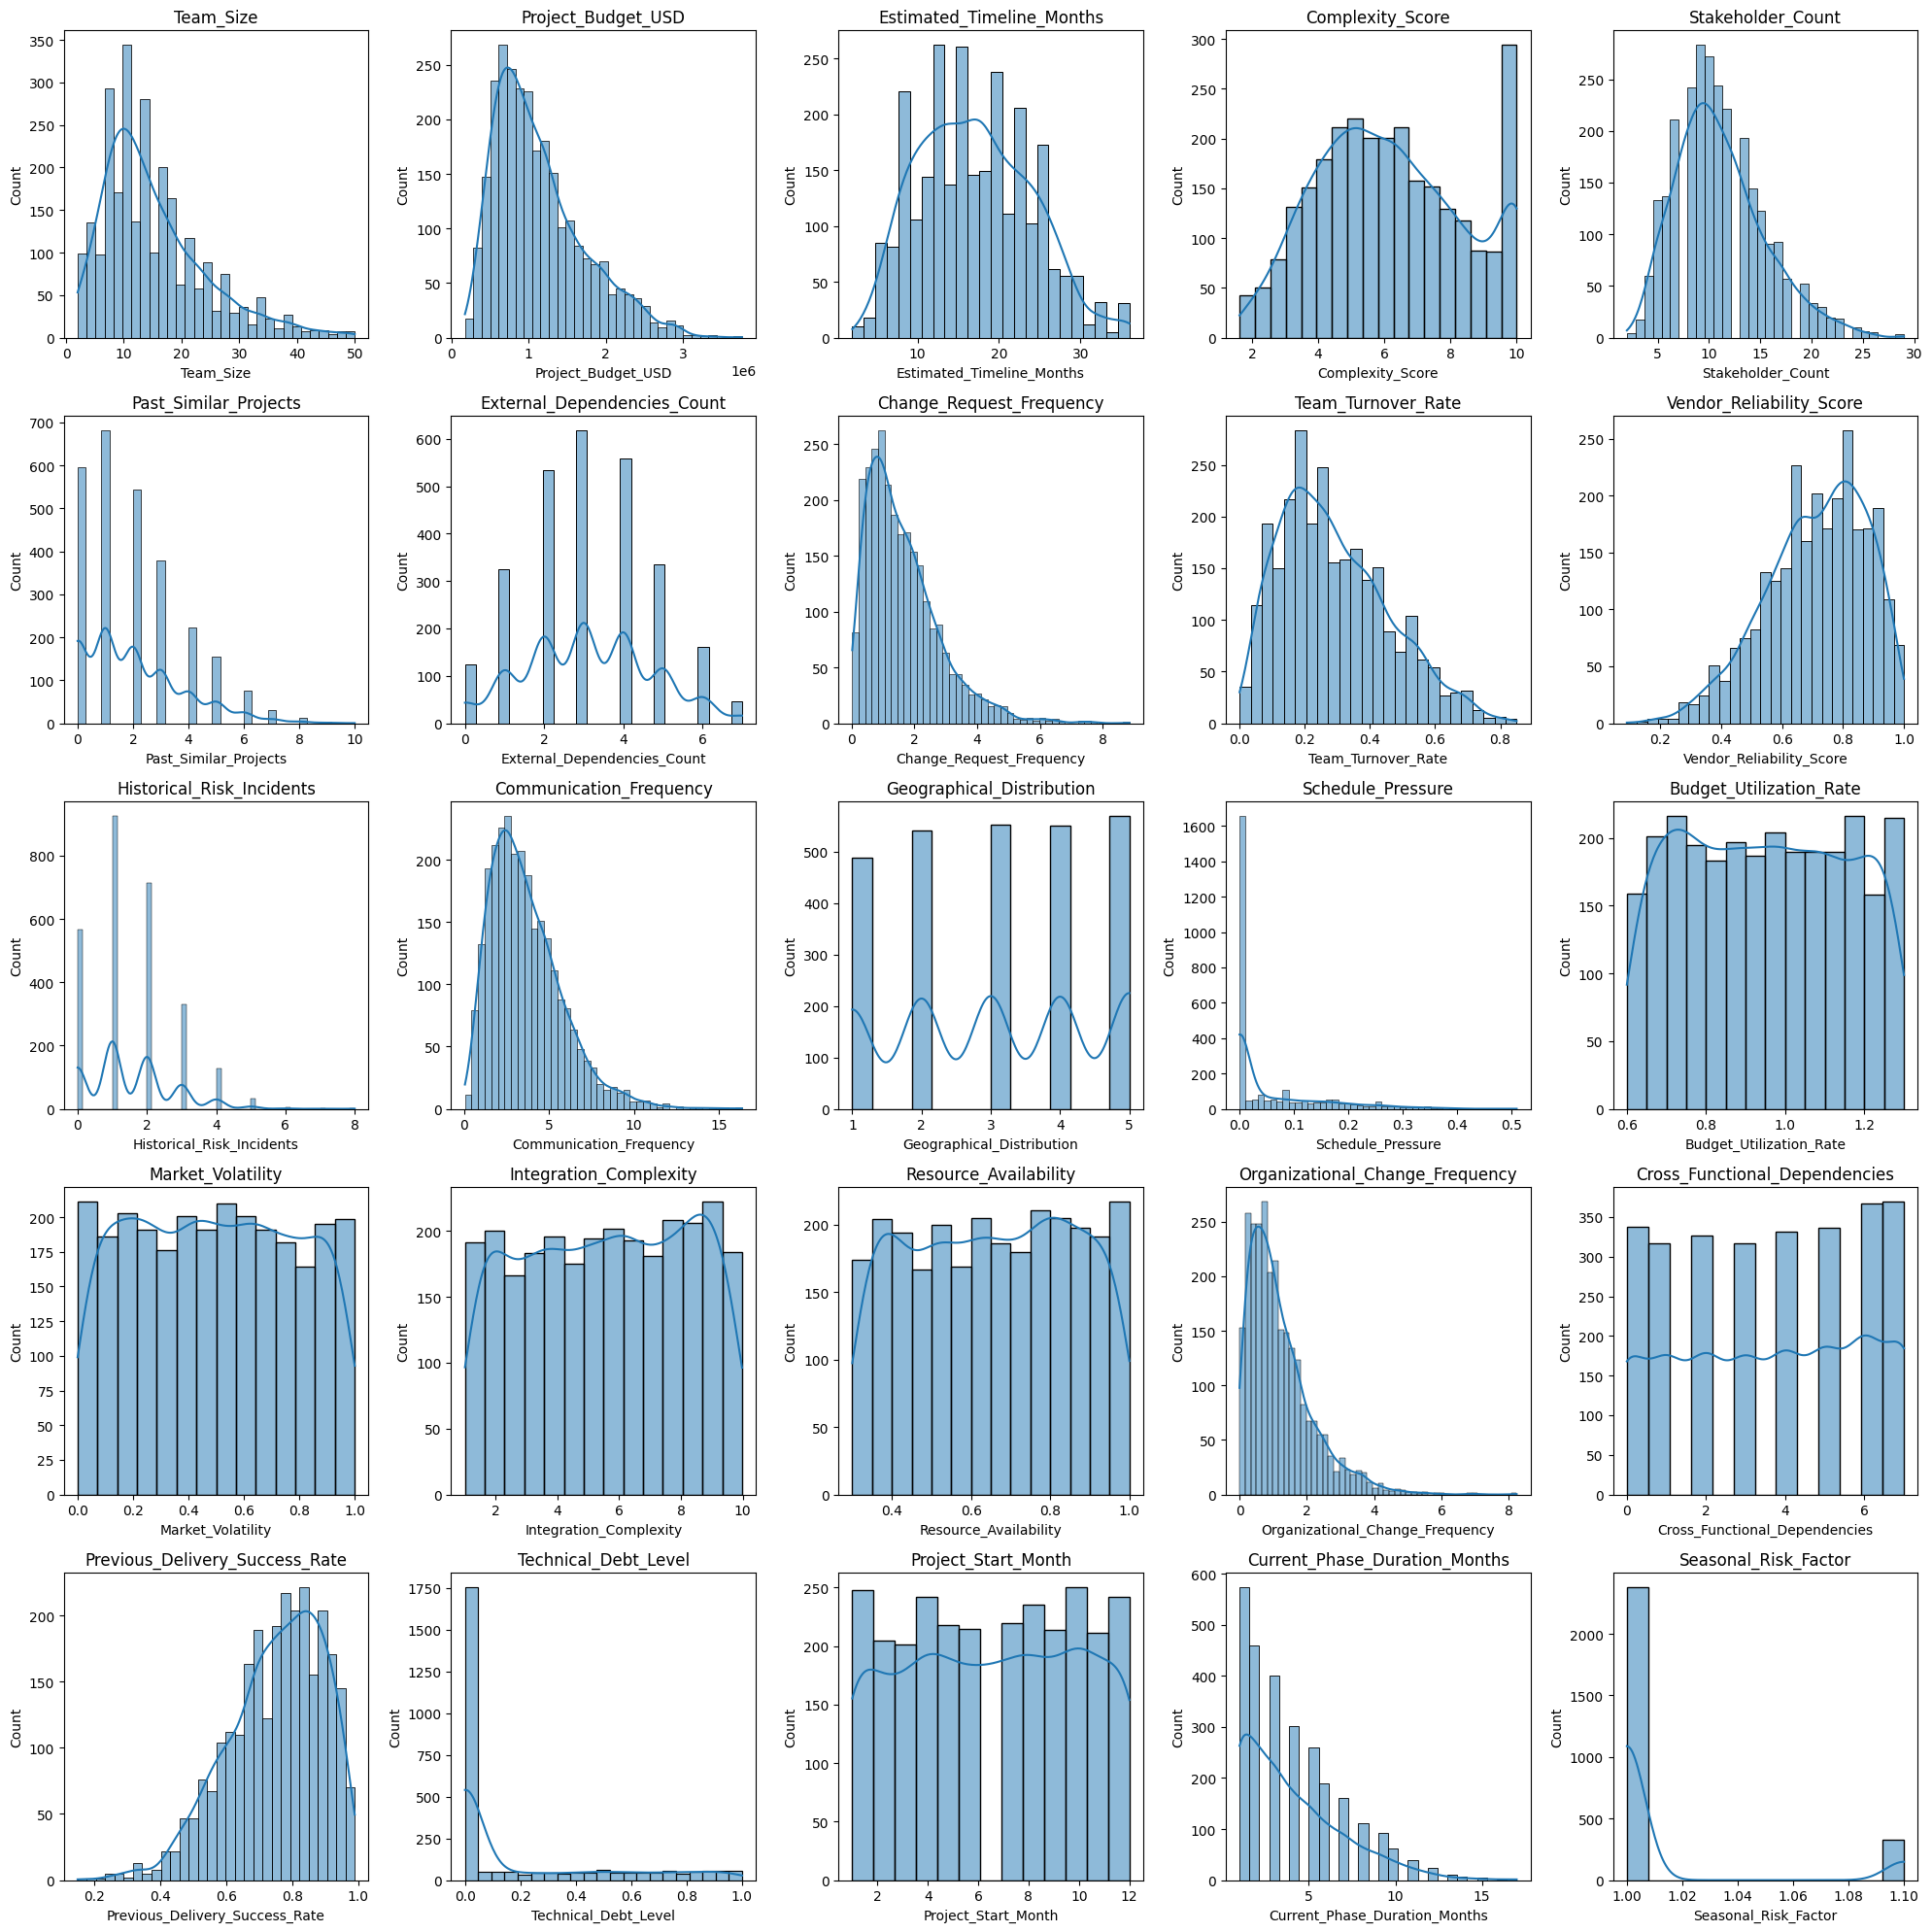

In [33]:
# Plotting the distribution after cleaning
# Select numeric columns
num_cols = df_.select_dtypes(include=['int64', 'float64']).columns

# Determine grid size
n_cols = 5  # number of plots per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten() 

for i, col in enumerate(num_cols):
    sns.histplot(df_[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    
# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Graph before removing**

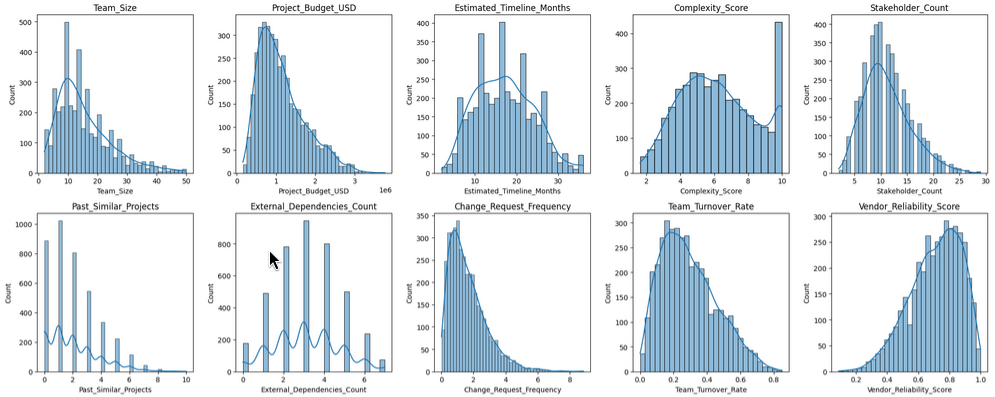

## Conclusion: Missing Value
We can see the distribution between both geraph from removing and keeping the NaN value on Change Control Maturity and Risk Management Maturity are total Random. 

Hence, we can drop out and study the rest of the data

In [34]:
df = df.drop(columns = 'Tech_Environment_Stability')
df = df.dropna(subset= ['Change_Control_Maturity', 'Risk_Management_Maturity'])

print(f'After dropping: ', df.shape)

After dropping:  (2701, 50)


# EDA

Before studying and divide between numerical and categorical, let us take a look at raw correlation matrix

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


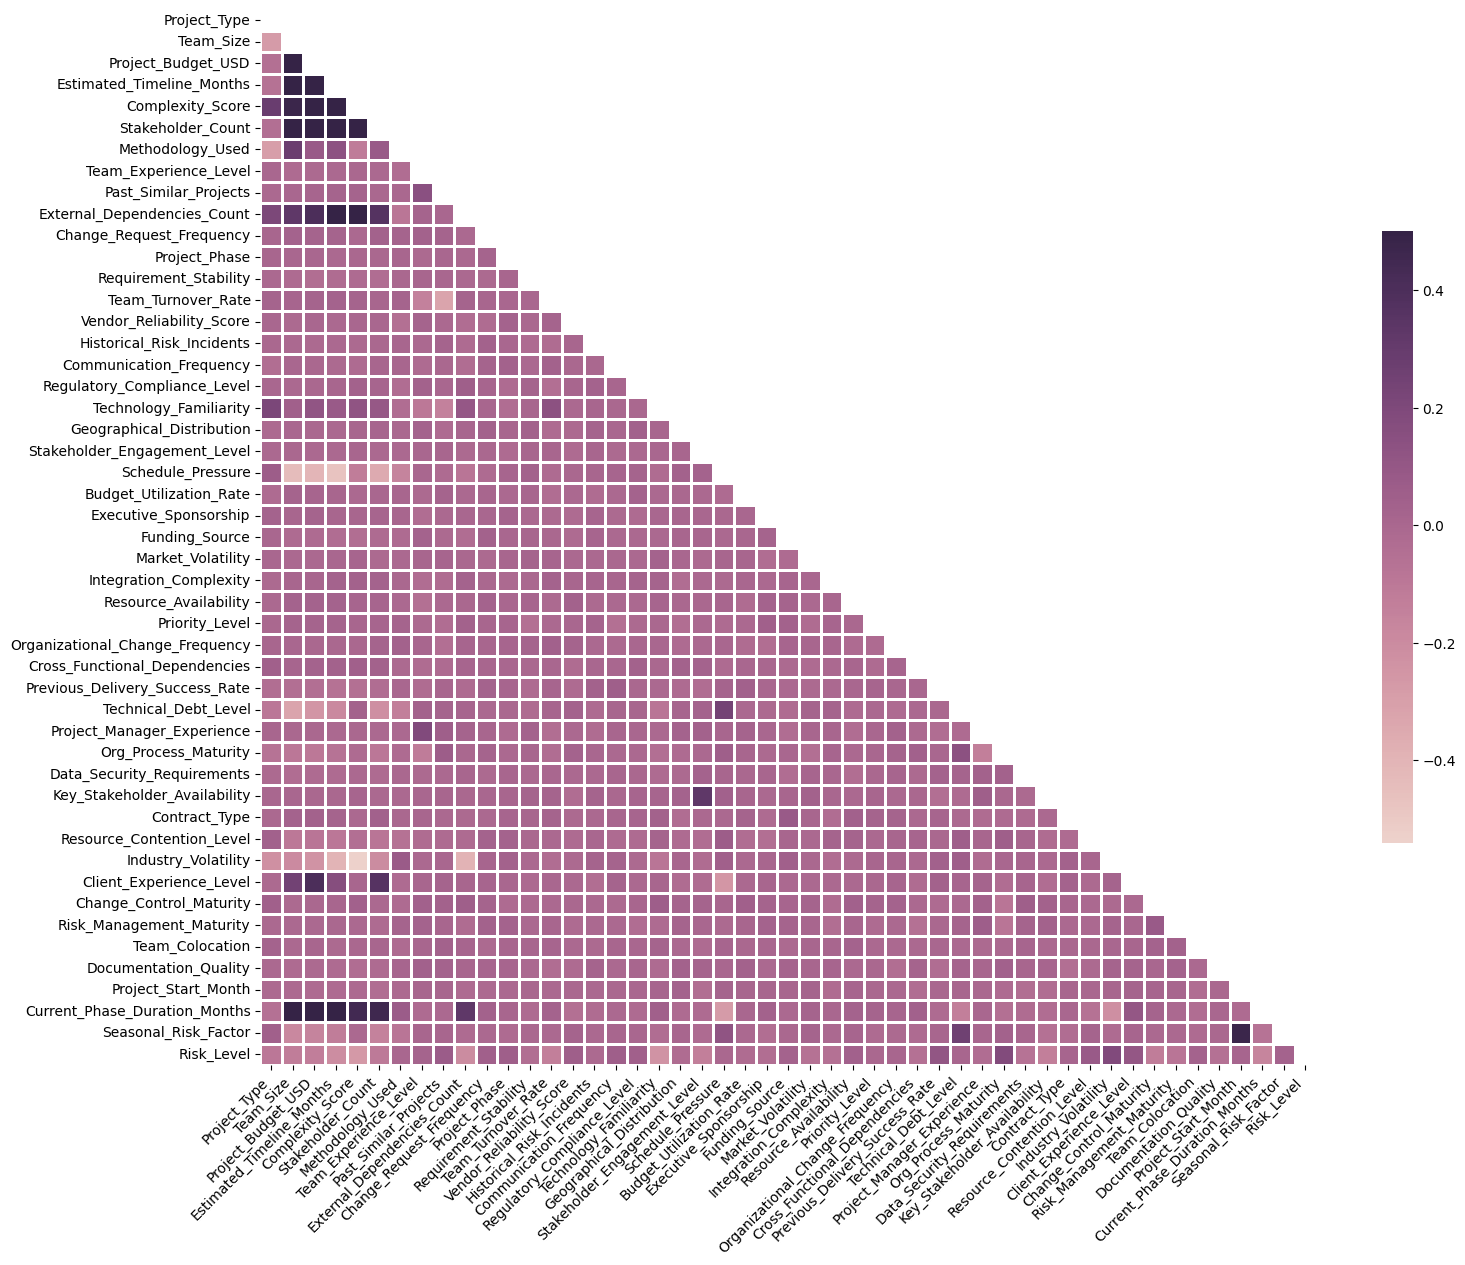

In [79]:
from sklearn.preprocessing import LabelEncoder

df_corr = df.drop(columns=["Project_ID"], errors="ignore").copy()

for col in df_corr.select_dtypes(include=["object", "category"]).columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

# --- Correlation matrix ---
corr = df_corr.corr()

# --- Mask & annotation ---
mask = np.triu(np.ones_like(corr, dtype=bool))
annot = corr.where((corr.abs() >= 0))

# --- Plot ---
plt.figure(figsize=(16, 14))

sns.heatmap(
    corr,
    mask=mask,
    cmap=sns.cubehelix_palette(as_cmap=True),
    vmax=0.5,
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.5},
    # annot=annot,
    fmt=".2f",
    annot_kws={"size": 8}
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

- There were 25 numerical data
- 26 categorical data

**Proposal of the study**
- We will understand and find the correlation between numerical first
- understand the correlation between categorical

In [35]:
df_col_numeric = []
for col in df_.columns:
    if df[col].dtypes != 'object':
        df_col_numeric.append(col)

len(df_col_numeric)

25

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

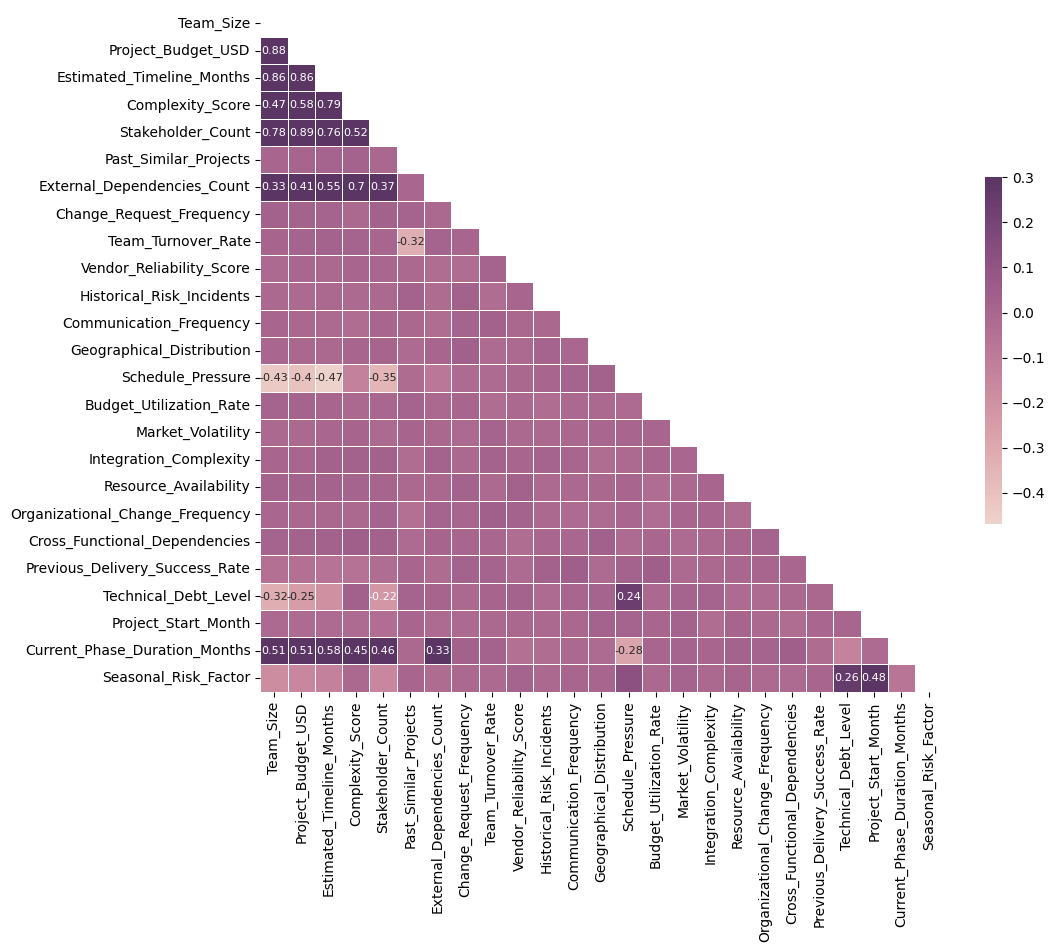

In [36]:
# Plot the numerical correlation

# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

corr = df_[df_col_numeric].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap =sns.cubehelix_palette(as_cmap=True)

annot = (
    corr.where((np.abs(corr) >= 0.2) & (np.abs(corr) < 1))
        .round(2)
        .astype(str)
        .replace("nan", "")
)
# print(annot)
annot = annot.astype(object)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, fmt="s",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = annot,
           annot_kws={"size": 8})

## PCA on Numerical Dataset

**Stakeholder_Count** share the most (better) correlation between other columns:
 - Project_Budget_USD
 - Estimated_Timeline_Months
 - Complexity_Score
 - Team_Size

 **External_Dependencies_Count** and **Current_Phase_Duration_Months** show moderately to the same columns and other more

 For easier method, we will try to reduce the columns with correlation using **multicolinearity**

 We will try reduce using with **Curent_Phase_Duration_Months**

 While **Schedule_Pressure** and **Technical Debt** shows negative but positive correlation, we can bring them as one and put it as a model

In [37]:
# PCA : Stakeholder_score, Project_Budget_USD, Estimated_Timeline_Months, Complexity_Score, Team_Size

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_PCA = ['Stakeholder_Count','Project_Budget_USD', 'Estimated_Timeline_Months', 'Complexity_Score', 'Team_Size']
df_PCA = df_[cols_PCA]

In [38]:
'''
    fig, ax = plt.subplots(2,3, figsize=(16,20))
    ax = ax.flatten()
    for i,col in enumerate(cols_PCA): 
        sns.histplot(df_PCA[col] ,kde=True, ax = ax[i])
        ax[i].set_title(col)
    plt.show()
'''

scaler = StandardScaler()

X = df_PCA[cols_PCA].values
x_scaled = scaler.fit_transform(X)

pca = PCA()
x_pca = pca.fit_transform(x_scaled)


'''
Percentage of variance explained by each of the selected components.

If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
'''
explained_variances = pca.explained_variance_ratio_
cumulative = np.cumsum(explained_variances)

n_show = min(20, len(explained_variances))
pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_variances))],
    'explained_variance': explained_variances,
    'cumulative':  cumulative
})

,PC,explained_variance,cumulative
0,PC1,0.797235,0.797235
1,PC2,0.129298,0.926533
2,PC3,0.049948,0.976481
3,PC4,0.015792,0.992273
4,PC5,0.007727,1.000000


*From the dataframe, we can see that PC1 and PC2 give out 90% reason to all the correlation between all the variables. 
But we want to see which variable stnads out the most to PC1 and PC2*

In [39]:
loadings = pca.components_.T

loading_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=cols_PCA
)
explained_variance = pca.explained_variance_  # eigenvalues
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance)
print(explained_variance_ratio)
print(loading_df)
print(loading_df.iloc[:, :2])

[3.98765365 0.64672766 0.24983066 0.07899155 0.03864834]
[0.79723546 0.12929764 0.04994763 0.01579246 0.00772681]
                                PC1       PC2       PC3       PC4       PC5
Stakeholder_Count          0.446405  0.307451  0.721160 -0.430167 -0.032868
Project_Budget_USD         0.476702  0.235699  0.106759  0.835189  0.090903
Estimated_Timeline_Months  0.480225 -0.205475 -0.327972 -0.255233  0.744617
Complexity_Score           0.369052 -0.830891  0.137103  0.048785 -0.390185
Team_Size                  0.454601  0.342520 -0.584951 -0.223366 -0.532877
                                PC1       PC2
Stakeholder_Count          0.446405  0.307451
Project_Budget_USD         0.476702  0.235699
Estimated_Timeline_Months  0.480225 -0.205475
Complexity_Score           0.369052 -0.830891
Team_Size                  0.454601  0.342520


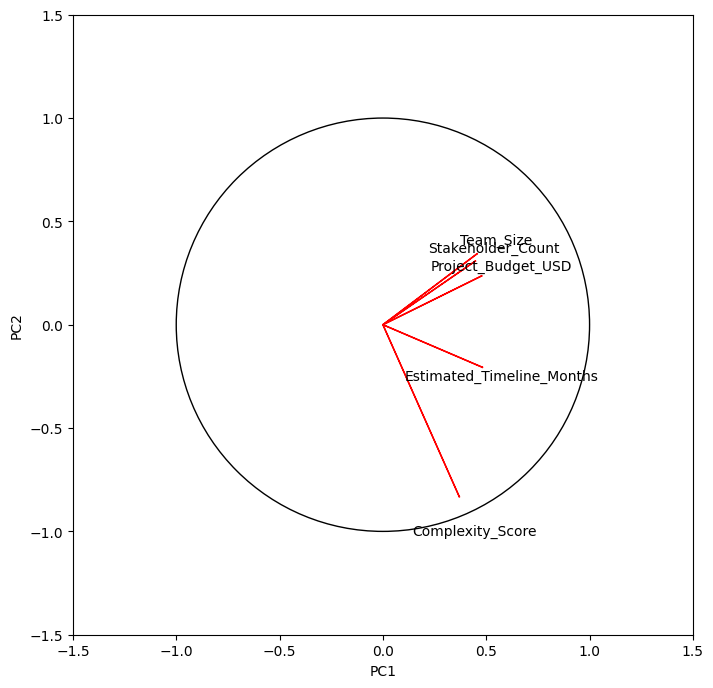

In [40]:
def plot_correlation(pca, features, figsize):
    fig, ax = plt.subplots(figsize= figsize)

    circle = plt.Circle((0, 0), 1, fill=False)
    ax.add_artist(circle)

    for i, feature in enumerate(features):
        ax.arrow(0,0, pca.components_[0,i], pca.components_[1, i], fc='red', ec='red')
        ax.text(pca.components_[0,i]*1.2, pca.components_[1,i]*1.2, feature, ha='center', va='center')

    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_aspect('equal')

    return fig, ax


plot_correlation(pca, cols_PCA, (8,16))
plt.show()

*From the result we can see that most of the variables point to PC2, except **Complexity_Score** which point to the negative of PC1*

At the moment, we can model the numerical as $Y=\alpha_1*PCA1 + \alpha_2 * PCA2 + \alpha_3* SchedulePressure$

where

$PC1=0.4464⋅Stakeholder_Count+0.4767⋅Project_Budget_USD+0.4802⋅Estimated_Timeline_Months+0.3691⋅Complexity_Score+0.4546⋅Team_Size$
$PC2=0.3075⋅Stakeholder_Count+0.2357⋅Project_Budget_USD−0.2055⋅Estimated_Timeline_Months−0.8309⋅Complexity_Score+0.3425⋅Team_Size$

In [41]:
'''
Seasonal_Risk_Factor , Technical_Debt_Level, Project_Start_Month shows a small correlation between them, 
we will try to reduce this to a variable then add to our model
'''

cols_PCA = ['Seasonal_Risk_Factor' , 'Technical_Debt_Level', 'Project_Start_Month']
df_PCA = df_[cols_PCA]

X = df_PCA[cols_PCA].values
x_scaled = scaler.fit_transform(X)

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

explained_variances = pca.explained_variance_ratio_
cumulative = np.cumsum(explained_variances)

n_show = min(20, len(explained_variances))
pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_variances))],
    'explained_variance': explained_variances,
    'cumulative':  cumulative
})

,PC,explained_variance,cumulative
0,PC1,0.514462,0.514462
1,PC2,0.331719,0.846181
2,PC3,0.153819,1.000000


In [42]:
loadings = pca.components_.T

loading_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=cols_PCA
)
explained_variance = pca.explained_variance_  # eigenvalues
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance)
print(explained_variance_ratio)
print(loading_df)
print(loading_df.iloc[:, :2])

[1.54395848 0.99552616 0.46162647]
[0.51446229 0.33171919 0.15381852]
                           PC1       PC2       PC3
Seasonal_Risk_Factor  0.705511 -0.005786 -0.708675
Technical_Debt_Level  0.342410  0.878290  0.333710
Project_Start_Month   0.620492 -0.478094  0.621624
                           PC1       PC2
Seasonal_Risk_Factor  0.705511 -0.005786
Technical_Debt_Level  0.342410  0.878290
Project_Start_Month   0.620492 -0.478094


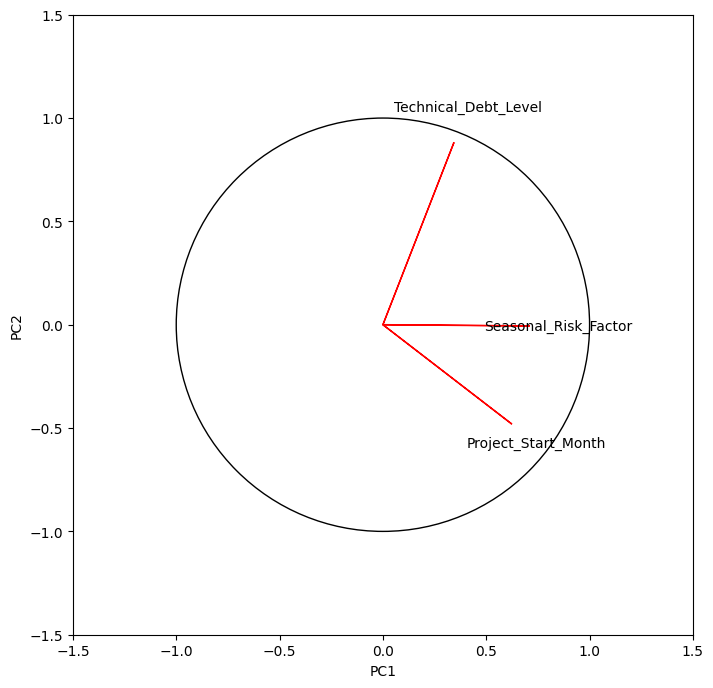

In [43]:
plot_correlation(pca, cols_PCA, (8,16))
plt.show()

*On this PC analysis, we can see that if bringing only one PC from the result describe around 50% of data, however to shorten our model and best to make it descriptive, we just keep it like that*

*PC2 shows a good understanding of $Seasonal Risk Factor$ but bringing the second PC will likely describe the variable itself only* 
our third PC, $PC3 = 0.705511 \times \text{Seasonal Risk Factor}  + 0.342410 \times \text{Technical Debt Level} + 0.620492 \times \text{Project Start Month} $

## PCA model on our Numerical DataSet

$Y=\alpha_1 \times PCA1 + \alpha_2 \times PCA2 + \alpha_3 \times \text{Schedule Pressure} + \alpha_4 \times PC4 $

## Corespondance Aanalysis on Categorical Dataset

*On this part, we will take an understanding how categorical data are related using **Chi-Square Statistic***

The chi-square test is a statistical method used to determine if there is a significant association between two categorical variables. It tests the following hypotheses:
$$\begin{cases}
H_0:\text{ There is no association between the two variables (they are independent).}\\
H_1:\text{ There is an association between the two variables (they are not independent).}
\end{cases}$$

In [44]:
df_col_category = []
for col in df_.columns:
    if df[col].dtypes == 'object':
        df_col_category.append(col)

len(df_col_category)

25

In [45]:
df_categorical = df[df_col_category]

# There are 2 columns to drop : [ Risk_Level, Project_ID]
df_categorical = df_categorical.drop(columns=['Project_ID'], axis = 1)
df_categorical.head()

,Project_Type,Methodology_Used,Team_Experience_Level,Project_Phase,Requirement_Stability,Regulatory_Compliance_Level,Technology_Familiarity,Stakeholder_Engagement_Level,Executive_Sponsorship,Funding_Source,...,Key_Stakeholder_Availability,Contract_Type,Resource_Contention_Level,Industry_Volatility,Client_Experience_Level,Change_Control_Maturity,Risk_Management_Maturity,Team_Colocation,Documentation_Quality,Risk_Level
0,Construction,Waterfall,Senior,Planning,Moderate,Medium,Expert,Medium,Moderate,Government,...,Limited,Time & Materials,High,Extreme,First-time,Basic,Basic,Fully Colocated,Good,High
1,Manufacturing,Kanban,Mixed,Execution,Moderate,High,Familiar,Excellent,Weak,External,...,Excellent,Cost-Plus,Low,Stable,Occasional,Advanced,Formal,Fully Remote,Poor,Low
3,IT,Scrum,Mixed,Initiation,Moderate,Low,Familiar,Medium,Moderate,Mixed,...,Good,Hybrid,High,Extreme,Strategic,Formal,Basic,Hybrid,Basic,High
5,IT,Kanban,Mixed,Initiation,Moderate,Medium,Familiar,Poor,Weak,Mixed,...,Limited,Time & Materials,Low,Stable,Strategic,Formal,Advanced,Hybrid,Basic,Medium
7,Healthcare,Kanban,Mixed,Closure,Moderate,High,New,High,Moderate,Mixed,...,Excellent,Time & Materials,Low,High,Strategic,Formal,Basic,Partially Colocated,Poor,Low


In [46]:
df_categorical.columns

Index(['Project_Type', 'Methodology_Used', 'Team_Experience_Level',
       'Project_Phase', 'Requirement_Stability', 'Regulatory_Compliance_Level',
       'Technology_Familiarity', 'Stakeholder_Engagement_Level',
       'Executive_Sponsorship', 'Funding_Source', 'Priority_Level',
       'Project_Manager_Experience', 'Org_Process_Maturity',
       'Data_Security_Requirements', 'Key_Stakeholder_Availability',
       'Contract_Type', 'Resource_Contention_Level', 'Industry_Volatility',
       'Client_Experience_Level', 'Change_Control_Maturity',
       'Risk_Management_Maturity', 'Team_Colocation', 'Documentation_Quality',
       'Risk_Level'],
      dtype='object')

*Given these column we should categorize them into class to learn our CA better: (With the help of the chatbot)*


*However instead of CA, we will use MCA : **Multiple Correspondance Analysis***

**Project Structure**
- Project_Type
- Methodology_Used
- Project_Phase
- Contract_Type
- Priority_Level
- Funding_Source

**Team & Human Factors**
- Team_Experience_Level
- Project_Manager_Experience
- Client_Experience_Level
- Team_Colocation
- Key_Stakeholder_Availability
- Stakeholder_Engagement_Level
- Executive_Sponsorship


**Process, Governance & Control Maturity**
- Org_Process_Maturity
- Change_Control_Maturity
- Risk_Management_Maturity
- Requirement_Stability
- Documentation_Quality

**Technical, Regulatory & External Environment**
- Technology_Familiarity
- Data_Security_Requirements
- Regulatory_Compliance_Level
- Industry_Volatility
- Resource_Contention_Level

In [47]:
df_project_structure = df_categorical[['Project_Type',
                    'Methodology_Used',
                    'Project_Phase',
                    'Contract_Type',
                    'Priority_Level',
                    'Funding_Source',
                    'Risk_Level']]

df_human_factor = df_categorical[[
    'Team_Experience_Level',
    'Project_Manager_Experience',
    'Client_Experience_Level',
    'Team_Colocation',
    'Key_Stakeholder_Availability',
    'Stakeholder_Engagement_Level',
    'Executive_Sponsorship',
    'Risk_Level'
]]

df_governmance_control = df_categorical[[
    'Org_Process_Maturity',
    'Change_Control_Maturity',
    'Risk_Management_Maturity',
    'Requirement_Stability',
    'Documentation_Quality',
    'Risk_Level'

]]

df_technical = df_categorical[[
    'Technology_Familiarity',
    'Data_Security_Requirements',
    'Regulatory_Compliance_Level',
    'Industry_Volatility',
    'Resource_Contention_Level',
    'Risk_Level'
]]

In [48]:
df_project_structure

,Project_Type,Methodology_Used,Project_Phase,Contract_Type,Priority_Level,Funding_Source,Risk_Level
0,Construction,Waterfall,Planning,Time & Materials,Medium,Government,High
1,Manufacturing,Kanban,Execution,Cost-Plus,Low,External,Low
3,IT,Scrum,Initiation,Hybrid,Critical,Mixed,High
5,IT,Kanban,Initiation,Time & Materials,Medium,Mixed,Medium
7,Healthcare,Kanban,Closure,Time & Materials,High,Mixed,Low
...,...,...,...,...,...,...,...
3991,IT,Scrum,Closure,Time & Materials,Low,Internal,Low
3992,Construction,Waterfall,Closure,Fixed-Price,Low,External,Low
3993,IT,Agile,Execution,Fixed-Price,Medium,External,Critical
3998,R&D,Scrum,Planning,Fixed-Price,High,Mixed,High


In [49]:
# from scipy.stats import chi2_contingency

# def chi_square(table):
#     chi2_stat, p_value, dof, expected = chi2_contingency(table)
#     print(f"Chi-square statistic = {chi2_stat:.4f}")
#     print(f"Degrees of freedom = {dof}")
#     print(f"P-value = {p_value:.4f}")

!pip install prince
import prince
import random

def mca(df):
    mca = prince.MCA(n_components= min(5, len(df.columns)), n_iter = 10, copy = True, engine='scipy')

    mca = mca.fit(df)
    
    row_coords = mca.row_coordinates(df)
    col_coords = mca.column_coordinates(df)

    return mca, row_coords, col_coords

# BiPlot on the MCA
colors = ['red', 'black', 'blue', 'green', 'purple', 'orange']
def plot_mca_biplot(row_coords, col_coords, row_labels=None, col_labels=None):
    col = random.choice(colors)
    fig, ax = plt.subplots(figsize=(10,8))

    if row_labels is not None:
        for i, txt in enumerate(row_labels):
            ax.annotate(txt, (row_coords.iloc[i,0], row_coords.iloc[i,1]), fontsize=8, alpha=0.7)

    category_colors = [random.choice(colors) for _ in range(len(col_coords))]
    
    ax.scatter(col_coords[0], col_coords[1], color=category_colors, alpha=0.8, label='Categories')

    if col_labels is not None:
        for i, txt in enumerate(col_labels):
            ax.annotate(txt, (col_coords.iloc[i,0], col_coords.iloc[i,1]), color=category_colors[i], fontsize=9)

    ax.set_xlabel("Dim 1")
    ax.set_ylabel("Dim 2")
    ax.set_title("MCA Biplot")
    plt.grid(True)
    plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 75.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.8.0 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.8.0 which is incompatible.


             0         1         2         3         4
0    -0.920450  0.338642 -0.478939  0.452309 -0.613141
1    -0.068093 -0.743291  0.402040 -0.235117 -0.093443
3     0.404806 -0.113069 -0.387816 -0.061612  0.003498
5     0.319821 -0.623725 -0.309110  0.106893 -0.880295
7    -0.097426 -1.055280  0.159454 -0.015929  0.284969
...        ...       ...       ...       ...       ...
3991  0.312737 -0.405123  0.035263  0.587776  0.300933
3992 -0.870945  0.369487  0.791049  0.697712  0.114088
3993  0.519548  0.707893  0.241649 -0.063381 -0.451153
3998  0.432835  0.564624  0.045578  0.074451  0.417636
3999 -0.898637  0.018018 -0.398157  0.305010  0.061838

[2701 rows x 5 columns]


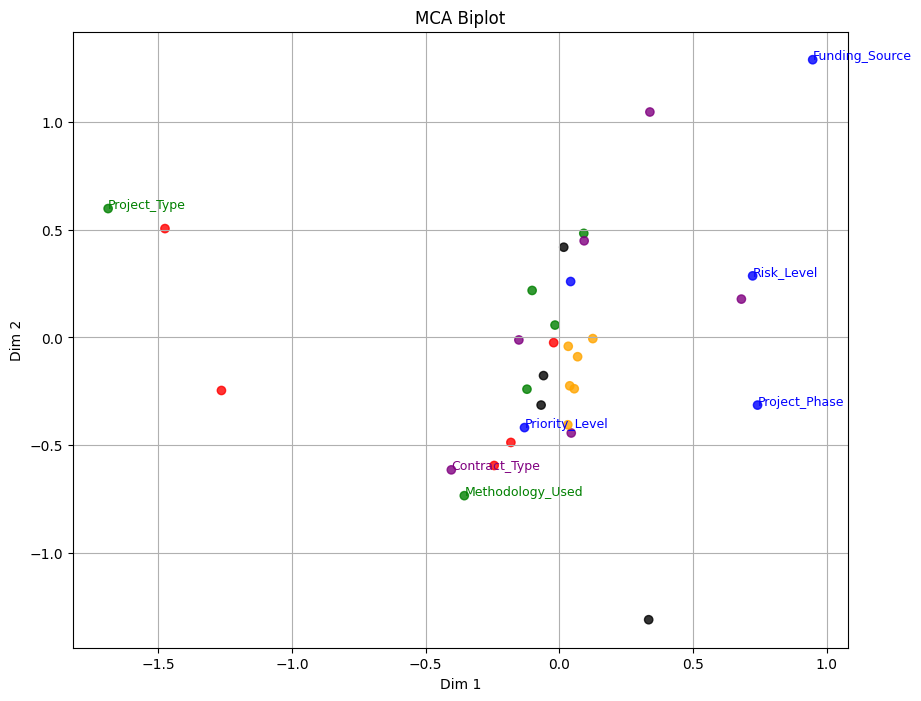

In [50]:
mca_model, row_coords, col_coords = mca(df_project_structure)


print(row_coords)
plot_mca_biplot(
    row_coords,
    col_coords,
    row_labels=None, 
    col_labels=df_project_structure.columns  # or categories names
)

             0         1         2         3         4
0     0.396079  0.447382  0.238910  0.237034  0.689952
1    -0.596406 -0.614281 -0.344303 -0.023571  0.695129
3    -0.122758 -0.050651 -0.265803  0.620227 -0.165184
5     0.372900 -0.093257 -0.081534  0.270018 -0.224204
7    -0.634039 -0.716548  0.102719 -0.187946  0.321051
...        ...       ...       ...       ...       ...
3991 -0.724082  0.039471 -0.392359  0.165343 -0.178283
3992 -0.697379 -0.112032  0.515937 -0.020956  0.348925
3993  0.586879  0.283602 -0.139273  0.081912  0.426280
3998  0.471232 -0.238525 -0.314748  0.160556  0.332137
3999 -0.102682 -0.155568  0.287702 -0.176964  0.129690

[2701 rows x 5 columns]


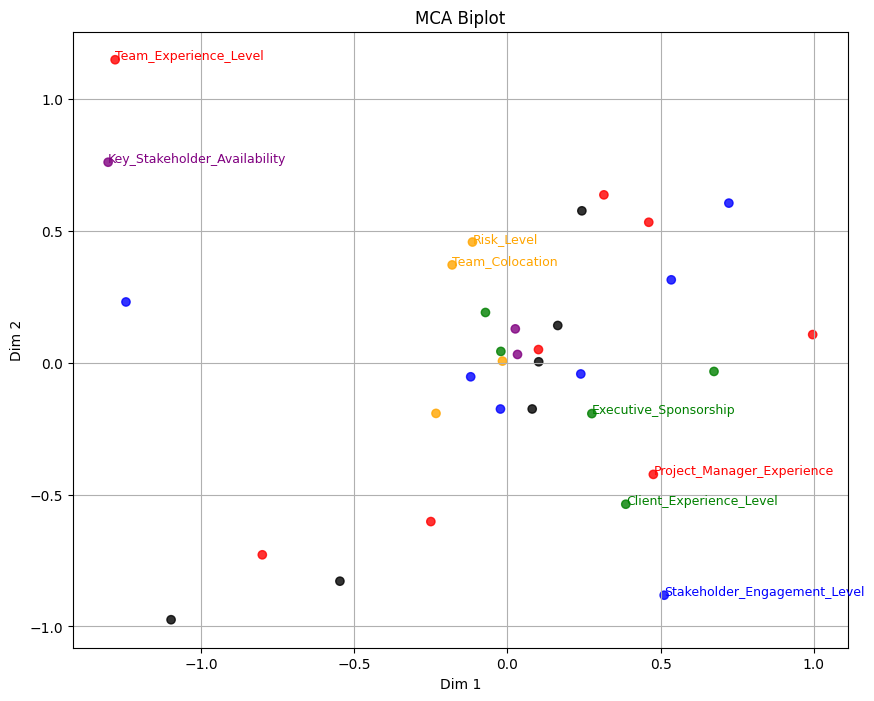

In [51]:
mca_model, row_coords, col_coords = mca(df_human_factor)


print(row_coords)
plot_mca_biplot(
    row_coords,
    col_coords,
    row_labels=None,  
    col_labels=df_human_factor.columns  # or categories names
)

             0         1         2         3         4
0     0.579650  0.007928  0.354179  0.267078  0.202893
1    -0.915278  0.156832 -0.276026  0.262912 -0.688676
3     0.464978 -0.325475  0.246751 -0.040049 -0.083126
5    -0.348950 -0.276471  0.116883 -0.396757  0.291467
7    -0.343045  0.164228 -0.153215  0.265731 -0.971058
...        ...       ...       ...       ...       ...
3991 -1.267042  0.646413 -0.339963  0.332309 -0.739824
3992 -0.164117 -0.256842  0.885612  0.082064 -0.658448
3993  0.276251 -0.964289 -0.477535  0.352840 -0.730020
3998  0.585916  0.150134  0.089263  0.108941  0.162011
3999  0.002814 -0.766051  0.180820 -0.466154  0.342615

[2701 rows x 5 columns]


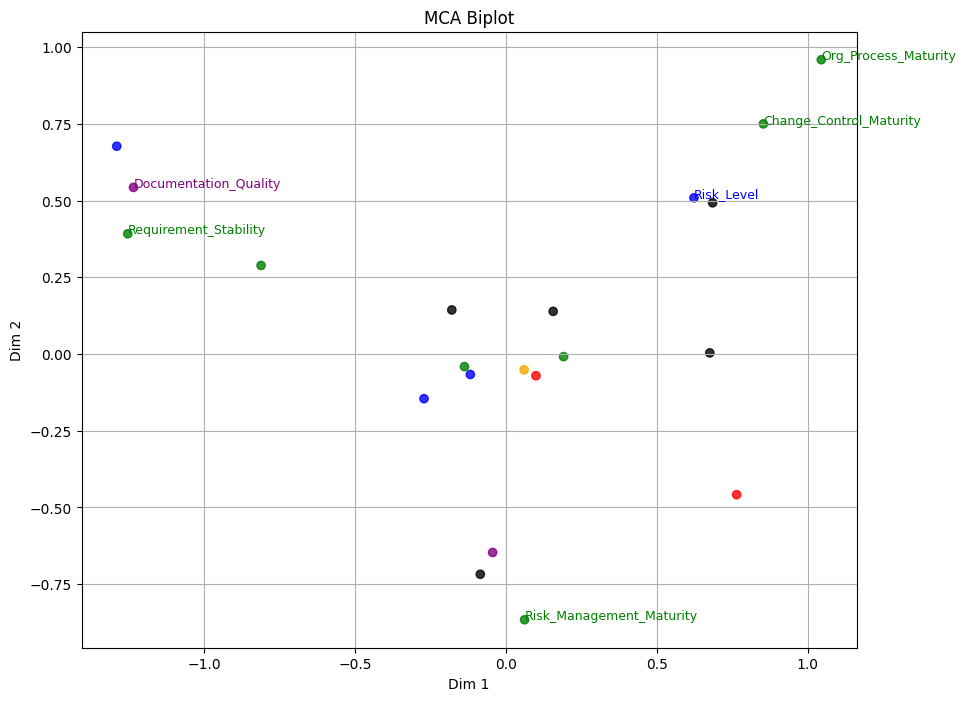

In [52]:
mca_model, row_coords, col_coords = mca(df_governmance_control)


print(row_coords)
plot_mca_biplot(
    row_coords,
    col_coords,
    row_labels=None, 
    col_labels=df_governmance_control.columns  # or categories names
)

             0         1         2         3         4
0     0.441751 -0.222737  0.713794 -0.562799 -0.513138
1    -0.678291 -0.934670  0.010362 -0.033524  0.787965
3     0.743617 -0.134616 -0.490173 -0.031495  0.053300
5    -0.576665  0.325212  0.302274 -0.237849  0.236334
7    -0.105504  0.122990 -0.195036 -0.059667 -0.049240
...        ...       ...       ...       ...       ...
3991 -0.276688 -1.173718 -0.334671 -0.251684 -0.002588
3992 -0.511952 -0.081750  0.340140 -0.537687 -0.669621
3993  0.491243 -0.414978  0.193121  0.082176 -0.359998
3998  0.512570  0.220599  0.564768  0.523824  0.489694
3999 -0.143441  0.475752  0.024906 -0.411523 -0.667979

[2701 rows x 5 columns]


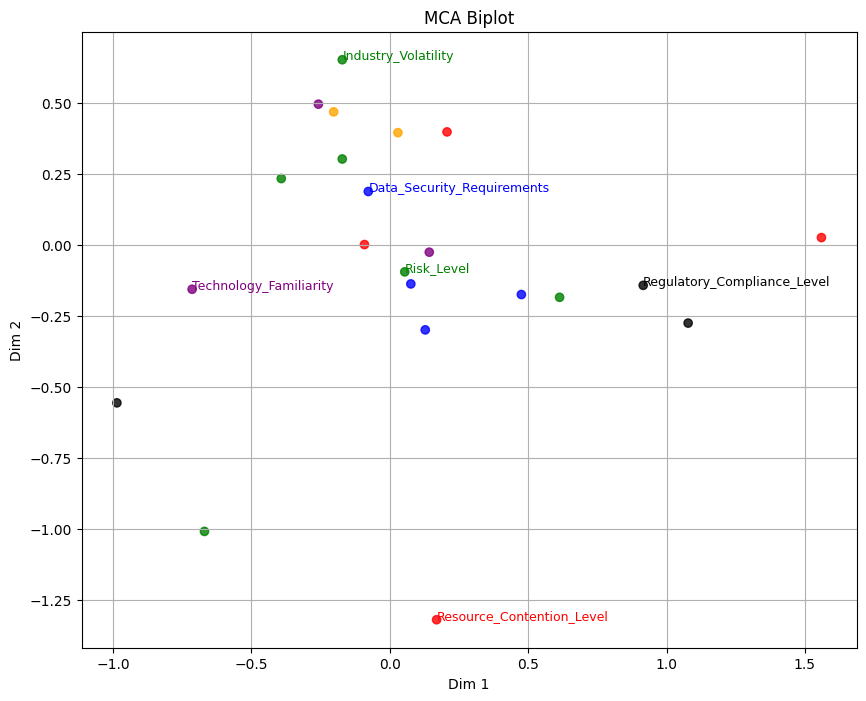

In [53]:
mca_model, row_coords, col_coords = mca(df_technical)


print(row_coords)
plot_mca_biplot(
    row_coords,
    col_coords,
    row_labels=None,  # optional: df.index
    col_labels=df_technical.columns  # or categories names
)

## Correspondance Conclusion

*From the MCA we can clearly see that $\text{Risk Level}$ share some relation with other, we will bring only one variable from it and try to model with them*

- Project_Phase
- Team_Collocation
- Change_Control_Maturity
- Data_Security_Requirements

# Modeling

From our first PCA we have this model

$Y=\alpha_1 \times PCA1 + \alpha_2 \times PCA2 + \alpha_3 \times \text{Schedule Pressure} + \alpha_4 \times PC3 $
where

$PC1=0.4464⋅Stakeholder_Count+0.4767⋅Project_Budget_USD+0.4802⋅Estimated_Timeline_Months+0.3691⋅Complexity_Score+0.4546⋅Team_Size$

$PC2=0.3075⋅Stakeholder_Count+0.2357⋅Project_Budget_USD−0.2055⋅Estimated_Timeline_Months−0.8309⋅Complexity_Score+0.3425⋅Team_Size$

$PC3 = 0.705511 \times \text{Seasonal Risk Factor}  + 0.342410 \times \text{Technical Debt Level} + 0.620492 \times \text{Project Start Month} $



From correspondance analysis, let

$Y=\gamma_1 \times \text{Project Phase} + \gamma_2 \times \text{Team Collocation} + \gamma_3 \times \text{Change Control Maturity} + \gamma_4 \times \text{Data Security Requirements}$

From both of the model we will try using them to work with **Logistic Regression**

## Preparation

To prepare and model our data well, there are things we could do:
- Normalize the numerical data
- Encode the categorical data

In [54]:
col_models = ['Stakeholder_Count', 'Project_Budget_USD', 'Estimated_Timeline_Months', 'Complexity_Score', 'Seasonal_Risk_Factor', 'Technical_Debt_Level', 'Project_Start_Month', # Numerical
             'Project_Phase', 'Team_Colocation', 'Change_Control_Maturity', 'Data_Security_Requirements',
             'Risk_Level'] #Categorical

df_model = df[col_models]
df_model.head(5)

,Stakeholder_Count,Project_Budget_USD,Estimated_Timeline_Months,Complexity_Score,Seasonal_Risk_Factor,Technical_Debt_Level,Project_Start_Month,Project_Phase,Team_Colocation,Change_Control_Maturity,Data_Security_Requirements,Risk_Level
0,16,1526276.55,32,9.70,1.0,0.00,10,Planning,Fully Colocated,Basic,Medium,High
1,9,390790.15,9,2.72,1.0,0.00,9,Execution,Fully Remote,Advanced,Low,Low
3,16,1427830.63,17,7.54,1.1,0.43,12,Initiation,Hybrid,Formal,Strict,High
5,12,1106456.85,18,7.11,1.0,0.37,3,Initiation,Hybrid,Formal,High,Medium
7,9,1208078.86,15,4.53,1.0,0.00,11,Closure,Partially Colocated,Formal,Strict,Low


In [55]:
!pip install scikit-learn==1.2.2

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 1. Group your columns by type
num_cols = [
    'Stakeholder_Count', 'Project_Budget_USD', 'Estimated_Timeline_Months', 
    'Complexity_Score', 'Seasonal_Risk_Factor', 'Technical_Debt_Level', 'Project_Start_Month'
]

cat_cols = [
    'Project_Phase', 'Team_Colocation', 'Change_Control_Maturity', 
    'Data_Security_Requirements'
]

# 2. Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 14.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.8.0
    Uninstalling scikit-learn-1.8.0:
      Successfully uninstalled scikit-learn-1.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prince 0.16.5 requires scikit-learn>=1.5.1, but you have scikit-learn 1.2.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [56]:
X = df_model.drop('Risk_Level', axis=1)
y = df_model['Risk_Level']

## Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42, stratify=y)

## Logistic Regression on our study

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
    
# 1. Split the data (80% training, 20% testing)
X = df_model.drop('Risk_Level', axis=1)
y = df_model['Risk_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    class_weight='balanced'
)

# Put it into your existing pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg) # Use the modified version here
])
# 2. Fit the pipeline using the training data only
model_pipeline.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# 4. Generate Reports
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Overall Accuracy: 34.01%

Classification Report:
              precision    recall  f1-score   support

    Critical       0.26      0.68      0.38        62
        High       0.29      0.23      0.26       132
         Low       0.43      0.46      0.44       161
      Medium       0.37      0.20      0.26       186

    accuracy                           0.34       541
   macro avg       0.34      0.39      0.33       541
weighted avg       0.36      0.34      0.33       541



## Logistic Regression on overall

We have **drop out** and **remove some rows** because of the missing value, we can use it to study because the study from EDA does not help with the model

In [116]:
def train_risk_level_logreg(df, test_size=0.2, random_state=42):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, confusion_matrix

    # --- Copy raw dataframe ---
    raw_df = df.copy()

    # --- Target ---
    y = raw_df["Risk_Level"]
    X = raw_df.drop(columns=["Risk_Level"])

    # --- Identify column types ---
    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    # --- Preprocessors ---
    numeric_processor = Pipeline(steps=[
        ("scaler", StandardScaler())
    ])

    categorical_processor = Pipeline(steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
    ])

    processor = ColumnTransformer(
        transformers=[
            ("num", numeric_processor, num_cols),
            ("cat", categorical_processor, cat_cols)
        ]
    )

    # --- Model ---
    model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', multi_class='auto')

    # --- Full pipeline ---
    pipeline = Pipeline(steps=[
        ("processor", processor),
        ("model", model)
    ])

    # --- Train-test split ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        stratify=y,
        random_state=random_state
    )

    # --- Fit ---
    pipeline.fit(X_train, y_train)

    # --- Evaluate ---
    y_pred = pipeline.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return pipeline

In [117]:
model_pipeline = train_risk_level_logreg(df)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Confusion Matrix:
[[ 50  21   0   0]
 [ 36  67   0  25]
 [  0   0 121  19]
 [  5  42  31 124]]

Classification Report:
              precision    recall  f1-score   support

    Critical       0.55      0.70      0.62        71
        High       0.52      0.52      0.52       128
         Low       0.80      0.86      0.83       140
      Medium       0.74      0.61      0.67       202

    accuracy                           0.67       541
   macro avg       0.65      0.68      0.66       541
weighted avg       0.68      0.67      0.67       541



In [118]:
df_copy = df.copy()

y = df_copy["Risk_Level"]
X = df_copy.drop(columns=["Risk_Level", "Project_ID"], errors="ignore")

# --- Column groups ---
num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

# --- ColumnTransformer ---
ct = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", sparse=False), cat_cols)
    ],
    remainder="drop"
)

# --- Transform ---
X_transformed = ct.fit_transform(X)

# --- Feature names ---
feature_names = (
    list(num_cols) +
    list(ct.named_transformers_["cat"].get_feature_names_out(cat_cols))
)

df_transformed = pd.DataFrame(X_transformed, columns=feature_names)

corr_with_target = df_transformed.corrwith(pd.Series(y_encoded))

neg_corr_cols = corr_with_target[corr_with_target < -0.1]

print(neg_corr_cols.keys())

# print(neg_corr_cols.sort_values())
# --- Correlation with Risk_Level ---
# corr_with_target = df_transformed.corrwith(y).abs()

# --- Low-correlation features ---
# threshold = 0.2
# low_corr_features = corr_with_target[corr_with_target < threshold]

# print(low_corr_features.sort_values())

Index(['Team_Size', 'Project_Budget_USD', 'Estimated_Timeline_Months',
       'Complexity_Score', 'Stakeholder_Count', 'External_Dependencies_Count',
       'Team_Turnover_Rate', 'Current_Phase_Duration_Months',
       'Project_Type_R&D', 'Team_Experience_Level_Junior',
       'Technology_Familiarity_New', 'Org_Process_Maturity_Defined',
       'Risk_Management_Maturity_Basic'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [119]:
remove_non_corr_df = df.copy().drop(columns=list(neg_corr_cols.index), errors="ignore")

In [120]:
remove_non_corr_df

,Project_ID,Project_Type,Methodology_Used,Team_Experience_Level,Past_Similar_Projects,Change_Request_Frequency,Project_Phase,Requirement_Stability,Vendor_Reliability_Score,Historical_Risk_Incidents,...,Resource_Contention_Level,Industry_Volatility,Client_Experience_Level,Change_Control_Maturity,Risk_Management_Maturity,Team_Colocation,Documentation_Quality,Project_Start_Month,Seasonal_Risk_Factor,Risk_Level
0,PROJ_0001,Construction,Waterfall,Senior,3,1.05,Planning,Moderate,0.84,2,...,High,Extreme,First-time,Basic,Basic,Fully Colocated,Good,10,1.0,High
1,PROJ_0002,Manufacturing,Kanban,Mixed,0,2.61,Execution,Moderate,0.79,2,...,Low,Stable,Occasional,Advanced,Formal,Fully Remote,Poor,9,1.0,Low
3,PROJ_0004,IT,Scrum,Mixed,0,2.42,Initiation,Moderate,0.84,1,...,High,Extreme,Strategic,Formal,Basic,Hybrid,Basic,12,1.1,High
5,PROJ_0006,IT,Kanban,Mixed,0,0.68,Initiation,Moderate,0.83,2,...,Low,Stable,Strategic,Formal,Advanced,Hybrid,Basic,3,1.0,Medium
7,PROJ_0008,Healthcare,Kanban,Mixed,3,0.28,Closure,Moderate,0.84,2,...,Low,High,Strategic,Formal,Basic,Partially Colocated,Poor,11,1.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,PROJ_3992,IT,Scrum,Mixed,0,1.36,Closure,Moderate,0.36,0,...,Low,Stable,Regular,Advanced,Advanced,Fully Remote,Poor,7,1.0,Low
3992,PROJ_3993,Construction,Waterfall,Senior,0,2.03,Closure,Stable,0.70,0,...,High,Moderate,Strategic,Formal,Basic,Fully Remote,Excellent,10,1.0,Low
3993,PROJ_3994,IT,Agile,Senior,6,2.51,Execution,Moderate,0.34,2,...,High,Stable,Regular,Formal,Formal,Fully Remote,Poor,2,1.0,Critical
3998,PROJ_3999,R&D,Scrum,Junior,1,1.19,Planning,Moderate,0.50,0,...,Medium,High,Strategic,Basic,Formal,Fully Remote,Good,1,1.0,High


In [121]:
model_pipeline = train_risk_level_logreg(remove_non_corr_df.drop(columns = 'Project_ID'))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Confusion Matrix:
[[ 52  16   0   3]
 [ 37  66   1  24]
 [  0   0 121  19]
 [  9  40  44 109]]

Classification Report:
              precision    recall  f1-score   support

    Critical       0.53      0.73      0.62        71
        High       0.54      0.52      0.53       128
         Low       0.73      0.86      0.79       140
      Medium       0.70      0.54      0.61       202

    accuracy                           0.64       541
   macro avg       0.63      0.66      0.64       541
weighted avg       0.65      0.64      0.64       541



In [122]:
def train_risk_level_logreg_cv(df, n_splits=5, random_state=42):
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import StratifiedKFold, cross_val_predict
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, confusion_matrix

    # --- Copy raw dataframe ---
    raw_df = df.copy()

    # --- Target & features ---
    y = raw_df["Risk_Level"]
    X = raw_df.drop(columns=["Risk_Level", "Project_ID"], errors="ignore")

    # --- Identify column types ---
    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    # --- Preprocessors ---
    numeric_processor = Pipeline(steps=[
        ("scaler", StandardScaler())
    ])
    categorical_processor = Pipeline(steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
    ])

    processor = ColumnTransformer(
        transformers=[
            ("num", numeric_processor, num_cols),
            ("cat", categorical_processor, cat_cols)
        ]
    )

    # --- Model ---
    model = LogisticRegression(
        max_iter=1000,
        solver='lbfgs',
        class_weight='balanced',
        multi_class='auto'
    )

    # --- Full pipeline ---
    pipeline = Pipeline(steps=[
        ("processor", processor),
        ("model", model)
    ])

    # --- Stratified K-Fold ---
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # --- Evaluate ---
    print("Confusion Matrix (CV):")
    print(confusion_matrix(y, y_pred))

    print("\nClassification Report (CV):")
    print(classification_report(y, y_pred))

    # --- Fit final model on all data ---
    pipeline.fit(X, y)

    return pipeline


In [143]:
train_risk_level_logreg_cv(df, 10)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Confusion Matrix (CV):
[[271  74   0  10]
 [139 392   4 107]
 [  0   4 584 109]
 [ 13 178 136 680]]

Classification Report (CV):
              precision    recall  f1-score   support

    Critical       0.64      0.76      0.70       355
        High       0.60      0.61      0.61       642
         Low       0.81      0.84      0.82       697
      Medium       0.75      0.68      0.71      1007

    accuracy                           0.71      2701
   macro avg       0.70      0.72      0.71      2701
weighted avg       0.72      0.71      0.71      2701



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Team_Size', 'Project_Budget_USD', 'Estimated_Timeline_Months',
       'Complexity_Score', 'Stakeholder_Count', 'Past_Similar_Projects',
       'External_Dependencies_Count', 'Change_Request_Frequency',
       'Team_Turnover_Rate', 'Vendor_Reliability_Score',...
       'Project_Manager_Experience', 'Org_Process_Maturity',
       'Data_Security_Requirements', 'Key_Stakeholder_Availability',
       'Contract_Type', 'Resource_Contention_Level', 'Industry_Volatility',
       'Client_Experience_Level', 'Change_Control_Maturity',
       'Risk_Management_Maturity', 'Team_Colocation', 'Documentation_Quality'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [144]:
def train_risk_level_logreg_ordinal(df, ordinal_cols=None, test_size=0.2, random_state=42):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, confusion_matrix

    # --- Copy raw dataframe ---
    raw_df = df.copy()

    # --- Target & Features ---
    y = raw_df["Risk_Level"]
    X = raw_df.drop(columns=["Risk_Level", "Project_ID"], errors="ignore")

    # --- Identify column types ---
    num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
    cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

    # --- Split ordinal vs nominal ---
    ordinal_cols = ordinal_cols or []  # pass list of ordinal columns
    nominal_cols = [c for c in cat_cols if c not in ordinal_cols]

    # --- Preprocessors ---
    numeric_processor = Pipeline([
        ("scaler", StandardScaler())
    ])
    ordinal_processor = Pipeline([
        ("ordinal", OrdinalEncoder())
    ])
    nominal_processor = Pipeline([
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False))
    ])

    processor = ColumnTransformer([
        ("num", numeric_processor, num_cols),
        ("ord", ordinal_processor, ordinal_cols),
        ("nom", nominal_processor, nominal_cols)
    ])

    # --- Model ---
    model = LogisticRegression(
        max_iter=1000,
        solver='lbfgs',
        class_weight='balanced',
        multi_class='auto'
    )

    # --- Pipeline ---
    pipeline = Pipeline([
        ("processor", processor),
        ("model", model)
    ])

    # --- Train-test split ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        stratify=y,
        random_state=random_state
    )

    # --- Fit model ---
    pipeline.fit(X_train, y_train)

    # --- Evaluate ---
    y_pred = pipeline.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return pipeline
train_risk_level_logreg_ordinal(df)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Confusion Matrix:
[[ 53  18   0   0]
 [ 40  66   0  22]
 [  0   0 123  17]
 [  5  44  33 120]]

Classification Report:
              precision    recall  f1-score   support

    Critical       0.54      0.75      0.63        71
        High       0.52      0.52      0.52       128
         Low       0.79      0.88      0.83       140
      Medium       0.75      0.59      0.66       202

    accuracy                           0.67       541
   macro avg       0.65      0.68      0.66       541
weighted avg       0.68      0.67      0.67       541



Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Team_Size',
                                                   'Project_Budget_USD',
                                                   'Estimated_Timeline_Months',
                                                   'Complexity_Score',
                                                   'Stakeholder_Count',
                                                   'Past_Similar_Projects',
                                                   'External_Dependencies_Count',
                                                   'Change_Request_Frequency',
                                                   'Team_Turnover_Rate',
                                                   'Vendor_Reliability_Score',
                                                   'Histo...
                                                   'Project_Manager_Experience',
                                                   'Org_Process_Maturity',
                                                   'Data_Security_Requirements',
                                                   'Key_Stakeholder_Availability',
                                                   'Contract_Type',
                                                   'Resource_Contention_Level',
                                                   'Industry_Volatility',
                                                   'Client_Experience_Level',
                                                   'Change_Control_Maturity',
                                                   'Risk_Management_Maturity',
                                                   'Team_Colocation',
                                                   'Documentation_Quality'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

# Conclusion

- With **PCA**, it does not help with concluding wells with the classification
- **Correspondance Analysis** helps us show the relationship well but not the causations to the risk
- Our correlation of **Risk Level** does not defind well, being able to use all the scope will help predict better

What we can do next?
- Try eliminating and find which columns that defind causations to **Risk Level**
